# ※ 442팀 과제 제출

### ★ 목차 ★

> ### 1. EDA 및 전처리
> #### 1.1. 파일불러오기  
> #### 1.2. EDA
> ##### 1.2.1. 데이터 구조 검토
> ##### 1.2.2. 데이터 유효값 검토
>> ① 범주형 컬럼 검토<br>
>> ② 날짜(일수) 변수 검토<br>
>> ③ FLAG변수 검토<br>
>> ④ Score변수 검토<br>
>> ⑤ 거주지등급 변수 검토<br>
>> ⑥ 금액 변수 검토<br>
> #### 1.3. 추가로 있으면 좋을만한 컬럼 생성
> ### 2. 데이터전처리 함수(버전별)
> #### 2.1. EDA를 통한 전처리함수 : V1
> #### 2.2. 신규변수 생성 후 전처리함수 : V2
> #### 2.3. 다중공선성 제거 후 전처리함수 : V3
> #### 2.4. 클러스트링 추가 후 전처리함수 : V4  
> ### 3. 예측결과 평가 측도
> ### 4. 버전별 모델링
> #### 4.1. 모델링 함수
> #### 4.2. 버전별 모델링 및 성능 측정
> ### 5. 변수 중요도
> #### 5.1.변수 중요도 함수 
> #### 5.2.버전별 변수중요도 측정 및 해석
> ## 6. 최종 결과물
> ### 6.1 전처리함수
> ### 6.2 모델링함수

# 1.EDA 및 전처리

## 1.1 파일불러오기

In [188]:
#!pip install pandasql
#!pip install sqldf
##### 1.1 파일불러오기  
#!pip show pandasql
# !pip install pycaret
#### 2.# !pip install catboost
# !pip install category_encoders
# !pip install shap

In [1]:
import pandas as pd
import numpy  as np
from sklearn import preprocessing
from pandasql import sqldf
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

from category_encoders.ordinal import OrdinalEncoder
from sklearn.metrics import roc_auc_score
# from pycaret.regression import *

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import warnings, random
warnings.filterwarnings(action='ignore')

ModuleNotFoundError: No module named 'catboost'

In [2]:
df_loan_customer = pd.read_csv("../0.data/loan_customer.csv")

In [3]:
df_loan_customer.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,...,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,...,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,...,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,...,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,...,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0


In [4]:
df_loan_customer.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
count,24000.000000,24000.000000,2.400000e+04,1.670000e+04,16851.000000,19251.000000,16851.000000,14267.000000,19259.000000,24000.0,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,17854.000000,15726.000000,16892.000000,24000.000000
mean,277994.337708,0.418083,1.725182e+05,5.954254e+05,0.020989,-16026.527453,63041.865112,-5016.930118,-2990.491926,1.0,...,0.076583,0.232042,0.181750,0.000167,0.709292,0.000125,49.942357,58.061950,60.368432,0.083042
std,102778.811383,0.727194,7.604604e+05,3.988125e+05,0.014061,4365.267387,140634.051334,3541.618561,1513.089981,0.0,...,0.265935,0.422144,0.385646,0.012909,0.454099,0.011180,13.095990,10.752802,8.682502,0.275951
min,100002.000000,0.000000,2.700000e+04,4.500000e+04,0.000290,-25197.000000,-16852.000000,-24672.000000,-6263.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.967147,0.000000
25%,188705.250000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19647.000000,-2772.000000,-7537.000000,-4308.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.026337,50.801249,54.410659,0.000000
50%,277908.500000,0.000000,1.440000e+05,5.108535e+05,0.018850,-15731.000000,-1206.000000,-4521.000000,-3251.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.894802,57.935604,59.971539,0.000000
75%,366537.250000,1.000000,2.025000e+05,8.086500e+05,0.028663,-12376.500000,-299.000000,-2050.500000,-1717.500000,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,58.919900,65.184718,66.097419,0.000000
max,456228.000000,7.000000,1.170000e+08,4.050000e+06,0.072508,-7688.000000,365243.000000,0.000000,0.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.870790,98.987986,100.000000,1.000000


_▶  AMT_INCOME_TOTAL, AMT_CREDIT, DAYS_BIRTHS, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, WEEKDAY_APPR_PROCESS_START , 23  HOUR_APPR_PROCESS_START   등은 분포를 보고 정규화 또는 범주화 해주는 작업 필요함_

## 1.2 EDA

### 1.2.1. 데이터 구조 검토

**☆ 결과 요약** <br>
- data 전체 : 24000건 <br>
- 결측치 있는 컬럼이 많음 → 결측치 있는 값 다 제거하면 438개 남음<br>
- 필요성과 추이를 잘 파악해 결측치를 잘 처리하는 것이 관건일 듯

In [5]:
# df로 복사
df = df_loan_customer

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

_▶총 24,000개의 데이터로 결측값 있는 건들이 많아보임_
>FLAG 건들은 대체로 NULL값이 없는편

In [7]:
print('▶ID_UNQUE: ',df["SK_ID_CURR"].unique().shape[0],"→ 중복ID없음")

▶ID_UNQUE:  24000 → 중복ID없음


In [8]:
#결측값들 있는 건들 요약
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column','count']
missing_df['ratio'] = missing_df['count']/df.shape[0]
missing_df.loc[missing_df['ratio']!=0]

,column,count,ratio
2,CODE_GENDER,7094,0.295583
3,FLAG_OWN_REALTY,9571,0.398792
6,AMT_CREDIT,7300,0.304167
11,REGION_POPULATION_RELATIVE,7149,0.297875
12,DAYS_BIRTH,4749,0.197875
13,DAYS_EMPLOYED,7149,0.297875
14,DAYS_REGISTRATION,9733,0.405542
15,DAYS_ID_PUBLISH,4741,0.197542
31,CB_SCORE_1,6146,0.256083
32,CB_SCORE_2,8274,0.344750


In [9]:
df_na_x = df.dropna(axis=0)

In [10]:
df_na_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 38 to 23954
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  438 non-null    int64  
 1   NAME_CONTRACT_TYPE          438 non-null    object 
 2   CODE_GENDER                 438 non-null    object 
 3   FLAG_OWN_REALTY             438 non-null    object 
 4   CNT_CHILDREN                438 non-null    int64  
 5   AMT_INCOME_TOTAL            438 non-null    float64
 6   AMT_CREDIT                  438 non-null    float64
 7   NAME_INCOME_TYPE            438 non-null    object 
 8   NAME_EDUCATION_TYPE         438 non-null    object 
 9   NAME_FAMILY_STATUS          438 non-null    object 
 10  NAME_HOUSING_TYPE           438 non-null    object 
 11  REGION_POPULATION_RELATIVE  438 non-null    float64
 12  DAYS_BIRTH                  438 non-null    float64
 13  DAYS_EMPLOYED               438 

_▶  결측값 있는행 다제거하면 438개밖에 안남음. NULL값이라고 다지우면 안되겠음._

### 1.2.2 데이터 유효값 검토

**☆ 결과 요약** <br>
- 데이터 유형별 검토를 통하여 이상치, 결측치 처리

#### 1.2.2 EDA-① 범주형 컬럼 검토

In [11]:
## 범주형 컬럼의 유효값 검토
for i in df.columns[df.dtypes == object] : 
    print(i, '\t',df[i].unique())

NAME_CONTRACT_TYPE 	 ['Cash loans' 'Revolving loans']
CODE_GENDER 	 ['M' nan 'F' 'XNA']
FLAG_OWN_REALTY 	 ['Y' nan 'N']
NAME_INCOME_TYPE 	 ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student'
 'Maternity leave' 'Businessman']
NAME_EDUCATION_TYPE 	 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS 	 ['Single / not married' 'Married' 'Separated' 'Civil marriage' 'Widow'
 'Unknown']
NAME_HOUSING_TYPE 	 ['House / apartment' 'Municipal apartment' 'With parents'
 'Rented apartment' 'Co-op apartment' 'Office apartment']
WEEKDAY_APPR_PROCESS_START 	 ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'FRIDAY' 'SUNDAY' 'TUESDAY' 'SATURDAY']
ORGANIZATION_TYPE 	 ['Business Entity Type 3' 'Government' 'Industry: type 1'
 'Transport: type 2' 'Self-employed' 'Industry: type 11'
 'Transport: type 4' 'XNA' 'Trade: type 2' 'Medicine' 'Hotel' 'Services'
 'Business Entity Type 2' 'Bank' 'Other' 'Trade: type 7'
 'Industry: type

In [12]:
# CODE_GENDER : F,M만 있어야 하는데 null값 아닌 이상치가 있음 = 'XNA'
df[df['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
2763,141289,Revolving loans,XNA,NaN,0,207000.0,382500.0,Working,Secondary / secondary special,Married,...,0,0,Business Entity Type 1,0,0,0,40.822976,61.083553,NaN,0


In [13]:
# cleansing1 : null 값으로 변경
df.loc[df['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] =None

In [14]:
df.groupby('CODE_GENDER').count()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,11211,11211,6743,11211,11211,7828,11211,11211,11211,11211,...,11211,11211,11211,11211,11211,11211,8348,7398,7876,11211
M,5694,5694,3436,5694,5694,3948,5694,5694,5694,5694,...,5694,5694,5694,5694,5694,5694,4240,3706,4020,5694


In [15]:
print("▶대출 종류별 구성비◀")
df.groupby('NAME_CONTRACT_TYPE').count()['SK_ID_CURR']

▶대출 종류별 구성비◀


NAME_CONTRACT_TYPE
Cash loans         21733
Revolving loans     2267
Name: SK_ID_CURR, dtype: int64

_▶ 일반대출(약 90%),  마이너스 대출 (약 10%)로 일반대출 구성비가 훨씬 많음_

In [16]:
print("▶대출 종류별 연체율◀")
print(round(df.groupby(['NAME_CONTRACT_TYPE','TARGET']).count()['SK_ID_CURR']/df.groupby(['NAME_CONTRACT_TYPE']).count()['SK_ID_CURR']*100,2))

▶대출 종류별 연체율◀
NAME_CONTRACT_TYPE  TARGET
Cash loans          0         91.40
                    1          8.60
Revolving loans     0         94.49
                    1          5.51
Name: SK_ID_CURR, dtype: float64


_▶ 일반대출 연체율이 8.6%로 마이너스 대출 5.5%보다 높은 편_

In [17]:
print("▶GENDER별 연체율◀")
print("▶건수 : ",df["SK_ID_CURR"].groupby( df["CODE_GENDER"]).count())
print("\n▶연체율 : ",round(df.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']/df.groupby(['CODE_GENDER']).count()['SK_ID_CURR']*100,2))

▶GENDER별 연체율◀
▶건수 :  CODE_GENDER
F    11211
M     5694
Name: SK_ID_CURR, dtype: int64

▶연체율 :  CODE_GENDER  TARGET
F            0         92.95
             1          7.05
M            0         89.52
             1         10.48
Name: SK_ID_CURR, dtype: float64


In [172]:
print("▶소득유형 분포◀")
df["SK_ID_CURR"].groupby( df["NAME_INCOME_TYPE"]).count().sort_values()

▶소득유형 분포◀


NAME_INCOME_TYPE
Businessman                 1
Maternity leave             2
Student                     2
State servant            1714
Pensioner                4294
Commercial associate     5527
Working                 12460
Name: SK_ID_CURR, dtype: int64

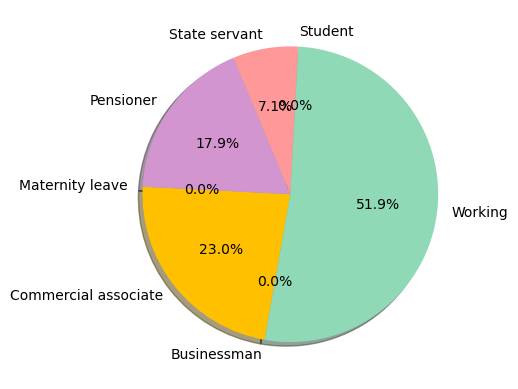

In [18]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0' ]
plt.pie(df["SK_ID_CURR"].groupby( df["NAME_INCOME_TYPE"]).count()
        , labels =  df["SK_ID_CURR"].groupby( df["NAME_INCOME_TYPE"]).count().index
        , autopct='%.1f%%', startangle=260, counterclock=False,  shadow=True, colors = colors)
plt.show()

_▶ working > commercial associate(상업) > Pensioner(연금수령자) > state_servant(국가공무원) 순 . 나머지는 큰차이안남_

In [19]:
print("▶소득타입별 연체분포 ◀")
df["TARGET"].groupby([df["TARGET"], df["NAME_INCOME_TYPE"]]).count().unstack("TARGET")

▶소득타입별 연체분포 ◀


TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,1.0,NaN
Commercial associate,5125.0,402.0
Maternity leave,2.0,NaN
Pensioner,4041.0,253.0
State servant,1627.0,87.0
Student,2.0,NaN
Working,11209.0,1251.0


_▶ Businessman 1건, Working 이랑 큰 차이없을 것으로 보임 . 'Businessman → Working'으로 변경<br>
▶ Maternity leave(출산휴가),  Student 각 2건이고 연체도 없어 모형에 큰 효과 없을 것으로 보임_

In [20]:
print("▶학력 분포◀")
df["TARGET"].groupby([df["TARGET"], df["NAME_EDUCATION_TYPE"]]).count().unstack("TARGET")

▶학력 분포◀


TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,15.0,NaN
Higher education,5542.0,315.0
Incomplete higher,735.0,61.0
Lower secondary,252.0,26.0
Secondary / secondary special,15463.0,1591.0


_▶ Lower secondary	< Secondary / secondary special < Incomplete higher < Higher education < Academic degree	<br>
    중등 < 중등/중등 특수 < 미완성 고등 < 고등 교육 < 학위_

In [21]:
print("▶결혼상태 분포◀")
df["TARGET"].groupby([df["TARGET"], df["NAME_FAMILY_STATUS"]]).count().unstack("TARGET")

▶결혼상태 분포◀


TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,2078.0,258.0
Married,14124.0,1151.0
Separated,1404.0,123.0
Single / not married,3181.0,376.0
Unknown,1.0,NaN
Widow,1219.0,85.0


_▶ Unknown은 NULL값 이므로 None 처리_

In [22]:
print("▶주거형태별 자가부동산보유여부 분포◀")
df["TARGET"].groupby([df["FLAG_OWN_REALTY"], df["NAME_HOUSING_TYPE"]]).count().unstack("FLAG_OWN_REALTY")

▶주거형태별 자가부동산보유여부 분포◀


FLAG_OWN_REALTY,N,Y
NAME_HOUSING_TYPE,,
Co-op apartment,16,25
House / apartment,3505,9267
Municipal apartment,323,217
Office apartment,54,59
Rented apartment,125,108
With parents,467,263


In [23]:
# 자가보유여부 ,1,0으로 바꾸기
df.loc[df['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
df.loc[df['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0

In [24]:
df["TARGET"].groupby([df["TARGET"], df["WEEKDAY_APPR_PROCESS_START"]]).count().unstack("TARGET")

TARGET,0,1
WEEKDAY_APPR_PROCESS_START,,
FRIDAY,3663,332
MONDAY,3681,296
SATURDAY,2370,222
SUNDAY,1281,106
THURSDAY,3516,327
TUESDAY,3761,374
WEDNESDAY,3735,336


In [178]:
df["NAME_INCOME_TYPE"].groupby([df["NAME_INCOME_TYPE"], df["ORGANIZATION_TYPE"]]).count().unstack("NAME_INCOME_TYPE")

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working
ORGANIZATION_TYPE,,,,,,,
Advertising,NaN,20.0,NaN,NaN,2.0,NaN,22.0
Agriculture,NaN,32.0,NaN,NaN,5.0,NaN,165.0
Bank,NaN,128.0,NaN,NaN,7.0,1.0,100.0
Business Entity Type 1,NaN,158.0,1.0,NaN,12.0,NaN,303.0
Business Entity Type 2,NaN,202.0,NaN,NaN,18.0,NaN,568.0
Business Entity Type 3,NaN,1878.0,NaN,NaN,48.0,NaN,3385.0
Cleaning,NaN,5.0,NaN,NaN,1.0,NaN,14.0
Construction,NaN,147.0,NaN,NaN,4.0,NaN,340.0
Culture,NaN,8.0,NaN,NaN,5.0,NaN,12.0


In [25]:
# 학생은 근무회사가 있을 수 없는데 있는 것들이 있음. None 처리
df.loc[df['NAME_INCOME_TYPE'] == 'Student', 'ORGANIZATION_TYPE'] =None
# Pensioner(연금수령자) 만 ORGANIZATION_TYPE(근무회사유형)이 XNA - NULL값으로 보기는 힘드므로 NULL과 혼동되지 않게 Pensioner로 변경
df.loc[df['NAME_INCOME_TYPE'] == 'Pensioner', 'ORGANIZATION_TYPE'] = "Pensioner"

In [26]:
print("▶자녀수 분포◀")
df["SK_ID_CURR"].groupby( df["CNT_CHILDREN"]).count().sort_values()

▶자녀수 분포◀


CNT_CHILDREN
7        1
5        9
4       41
3      341
2     2046
1     4703
0    16859
Name: SK_ID_CURR, dtype: int64

_▶ 자녀 4명이상 거의 없으므로 4명 이상은 4명으로_

In [27]:
df.loc[df['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4

#### 1.2.2 EDA-② 날짜(일수) 변수 검토

> - DAYS_BIRTH 대출 신청 시점에서의 일단위 나이 
> - DAYS_EMPLOYED 대출 신청 시점에서의 고객의 근무일수
> - DAYS_REGISTRATION 대출 신청 이전에 고객이 등록정보를 변경한 시점 사이의 일수
> - DAYS_ID_PULBISH 대출 신청 이전에 고객이 신분증을 변경한 시점 사이의 일수

In [28]:
# 모두 음수 단위의 일수로 표시됨
df['DAYS_BIRTH'].head()

0    -9461.0
1   -19046.0
2   -12931.0
3   -11286.0
4        NaN
Name: DAYS_BIRTH, dtype: float64

In [29]:
##나이 말고는 다 첫째짜리까지로 반올림
# DAYS_BIRTH : 연단위로 변경 → YEAR_BIRTH
df['YEAR_BIRTH'] = round(abs(df['DAYS_BIRTH'])/365,0)
print('▶ 나이 : \n',round(abs(df['DAYS_BIRTH'])/365,0).describe())
# DAYS_EMPLOYED : 연단위로 변경 → YEAR_EMPLOYED
df['YEAR_EMPLOYED'] = round(abs(df['DAYS_EMPLOYED'])/365,0)
print('▶ 근속년수 : \n',round(abs(df['DAYS_EMPLOYED'])/365,0).describe())
# DAYS_REGISTRATION : 연단위로 변경 → YEAR_REGISTRATION
df['YEAR_REGISTRATION'] = round(abs(df['DAYS_REGISTRATION'])/365,0)
print('▶ 등록년수 : \n',round(abs(df['DAYS_REGISTRATION'])/365,0).describe())
# DAYS_ID_PUBLISH : 연단위로 변경 → YEARS_ID_PUBLISH
df['YEAR_ID_PUBLISH'] = round(abs(df['DAYS_ID_PUBLISH'])/365,0)
print('▶ 신분증변경년수 : \n',round(abs(df['DAYS_ID_PUBLISH'])/365,0).describe())

▶ 나이 : 
 count    19251.000000
mean        43.908836
std         11.967317
min         21.000000
25%         34.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: DAYS_BIRTH, dtype: float64
▶ 근속년수 : 
 count    16851.000000
mean       183.523886
std        380.426554
min          0.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       1001.000000
Name: DAYS_EMPLOYED, dtype: float64
▶ 등록년수 : 
 count    14267.000000
mean        13.744726
std          9.709572
min          0.000000
25%          6.000000
50%         12.000000
75%         21.000000
max         68.000000
Name: DAYS_REGISTRATION, dtype: float64
▶ 신분증변경년수 : 
 count    19259.000000
mean         8.189418
std          4.161583
min          0.000000
25%          5.000000
50%          9.000000
75%         12.000000
max         17.000000
Name: DAYS_ID_PUBLISH, dtype: float64


_▶근속년수(YEARS_EMPLOYED) : 이상치 보임 : 1000년_


In [30]:
df.groupby('YEAR_EMPLOYED').count()['SK_ID_CURR']

YEAR_EMPLOYED
0.0        517
1.0       1928
2.0       1693
3.0       1554
4.0       1201
5.0       1074
6.0        829
7.0        777
8.0        676
9.0        534
10.0       479
11.0       365
12.0       288
13.0       256
14.0       252
15.0       212
16.0       143
17.0       122
18.0       118
19.0       106
20.0        95
21.0        95
22.0        80
23.0        59
24.0        35
25.0        40
26.0        39
27.0        25
28.0        39
29.0        26
30.0        29
31.0        27
32.0        30
33.0        21
34.0        26
35.0        16
36.0         8
37.0        11
38.0         4
39.0         8
40.0         4
41.0         2
42.0         2
43.0         2
44.0         1
45.0         2
46.0         2
1001.0    2999
Name: SK_ID_CURR, dtype: int64

> 1000.7년이 2999 건인걸로 보아, 결측치로 보임 <br>
    → 직업을 확인해보자

In [31]:
df["YEAR_EMPLOYED"].groupby([df["YEAR_EMPLOYED"], df["NAME_INCOME_TYPE"]]).count().unstack("YEAR_EMPLOYED")

YEAR_EMPLOYED,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,1001.0
NAME_INCOME_TYPE,,,,,,,,,,,,,,,,,,,,,
Businessman,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commercial associate,170.0,634.0,497.0,456.0,365.0,314.0,239.0,203.0,197.0,146.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Maternity leave,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pensioner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999.0
State servant,31.0,82.0,91.0,102.0,74.0,88.0,74.0,73.0,59.0,57.0,...,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Student,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Working,316.0,1212.0,1105.0,995.0,762.0,670.0,516.0,501.0,420.0,331.0,...,2.0,4.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,NaN


_▶ Pensioner은 연금수령자니까 실제로 근속년수가 없으나, 최대값이라고 생각하고 처리_

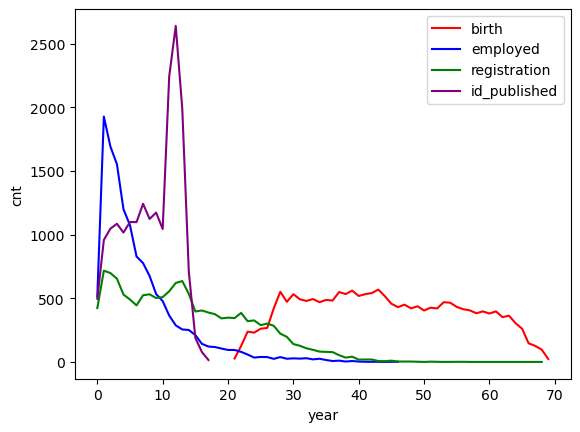

In [32]:
plt.xlabel('year')
plt.ylabel('cnt')
plt.plot(df.groupby('YEAR_BIRTH').count()['SK_ID_CURR'],color='red',label = 'birth')
plt.plot(df[df['YEAR_EMPLOYED'] < 1000].groupby('YEAR_EMPLOYED').count()['SK_ID_CURR'],color='blue',label = 'employed')
plt.plot(df.groupby('YEAR_REGISTRATION').count()['SK_ID_CURR'],color='green',label = 'registration')
plt.plot(df.groupby('YEAR_ID_PUBLISH').count()['SK_ID_CURR'],color='purple',label = 'id_published')
plt.legend()
plt.show()

> 특별히 이상치 없어보이나, ID_PUBLISHED 11~13년이 특히 많은 것은 신기

In [33]:
#  cleansing2 : 1001  연금수령자니까 최대값이라고 보고 50년 처리
df.loc[df['YEAR_EMPLOYED'] >= 1000, 'YEAR_EMPLOYED'] = df.loc[df['YEAR_EMPLOYED'] < 1000, 'YEAR_EMPLOYED'].max()

In [34]:
b2 = pd.DataFrame(columns = ['ind','birth_dflt','reg_dflt','idp_dflt','emp_dflt'],index=range(1,15))

for i in b2.index:
    print((i-1)*5,"~",i*5)
    
    b2['ind'].loc[i] = str((i-1)*5) + "~" + str(i*5)
    
    if  df[(df['YEAR_BIRTH']> (i-1)*5)&(df['YEAR_BIRTH']<= i*5)].shape[0] == 0:
        b2['birth_dflt'].loc[i] = 0.00
    else :
        b2['birth_dflt'].loc[i] = round(df[(df['YEAR_BIRTH']> (i-1)*5)&(df['YEAR_BIRTH']<= i*5)&(df['TARGET']== 1)].shape[0] / df[(df['YEAR_BIRTH']> (i-1)*5)&(df['YEAR_BIRTH']<= i*5)].shape[0],4)
        
    if  df[(df['YEAR_REGISTRATION']> (i-1)*5)&(df['YEAR_REGISTRATION']<= i*5)].shape[0] == 0:
        b2['reg_dflt'].loc[i] = 0.00
    else :
        b2['reg_dflt'].loc[i] = round(df[(df['YEAR_REGISTRATION']> (i-1)*5)&(df['YEAR_REGISTRATION']<= i*5)&(df['TARGET']== 1)].shape[0] / df[(df['YEAR_REGISTRATION']> (i-1)*5)&(df['YEAR_REGISTRATION']<= i*5)].shape[0],4)
        
    if  df[(df['YEAR_ID_PUBLISH']> (i-1)*5)&(df['YEAR_ID_PUBLISH']<= i*5)].shape[0] == 0:
        b2['idp_dflt'].loc[i] = 0.00
    else :
        b2['idp_dflt'].loc[i] = round(df[(df['YEAR_ID_PUBLISH']> (i-1)*5)&(df['YEAR_ID_PUBLISH']<= i*5)&(df['TARGET']== 1)].shape[0] / df[(df['YEAR_ID_PUBLISH']> (i-1)*5)&(df['YEAR_ID_PUBLISH']<= i*5)].shape[0],4)

    if  df[(df['YEAR_EMPLOYED']> (i-1)*5)&(df['YEAR_EMPLOYED']<= i*5)].shape[0] == 0:
        b2['emp_dflt'].loc[i] = 0.00
    else :
        b2['emp_dflt'].loc[i] = round(df[(df['YEAR_EMPLOYED']> (i-1)*5)&(df['YEAR_EMPLOYED']<= i*5)&(df['TARGET']== 1)].shape[0] / df[(df['YEAR_EMPLOYED']> (i-1)*5)&(df['YEAR_EMPLOYED']<= i*5)].shape[0],4)


0 ~ 5
5 ~ 10
10 ~ 15
15 ~ 20
20 ~ 25
25 ~ 30
30 ~ 35
35 ~ 40
40 ~ 45
45 ~ 50
50 ~ 55
55 ~ 60
60 ~ 65
65 ~ 70


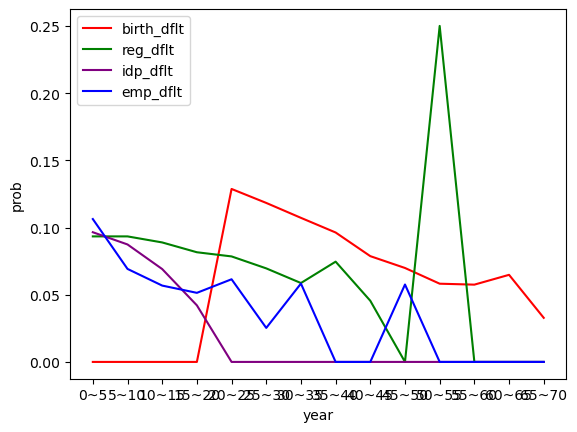

In [35]:
plt.xlabel('year')
plt.ylabel('prob')
b2.index = b2['ind']
plt.plot(b2['birth_dflt'],color='red',label = 'birth_dflt')  # 나이별
plt.plot(b2['reg_dflt'],color='green',label = 'reg_dflt')  # 등록정보변경시점별 연체율
plt.plot(b2['idp_dflt'],color='purple',label = 'idp_dflt') # 신분증변경시점별 연체율
plt.plot(b2['emp_dflt'],color='blue',label = 'emp_dflt') # 신분증변경시점별 연체율
plt.legend()
plt.show()

- id 등록년수 짧을수록 연체 높음
- 나이도 어릴수록 연체 높음
- 근속년수도 짧을수록 연체 높음
- 등록정보변경시점은 패턴을 보인다고하기 어려움.. 50대 튀는 것도 건수 적어서인듯(삭제해도 될듯)

In [36]:
df.groupby('YEAR_ID_PUBLISH').count()['SK_ID_CURR']

YEAR_ID_PUBLISH
0.0      497
1.0      959
2.0     1048
3.0     1086
4.0     1017
5.0     1100
6.0     1099
7.0     1243
8.0     1124
9.0     1174
10.0    1045
11.0    2243
12.0    2640
13.0    1989
14.0     710
15.0     190
16.0      79
17.0      16
Name: SK_ID_CURR, dtype: int64

In [37]:
df.groupby('REGION_POPULATION_RELATIVE').count()['SK_ID_CURR']

REGION_POPULATION_RELATIVE
0.000290      1
0.000533      1
0.000938      2
0.001276     26
0.001333     11
           ... 
0.031329    627
0.032561    347
0.035792    893
0.046220    734
0.072508    503
Name: SK_ID_CURR, Length: 81, dtype: int64

▷ 0, 0.1 둘중에 하나인데.. 그냥 1,0으로 바꿔주는 것이 좋을 듯

#### 1.2.2 EDA-③ FLAG변수 검토

In [38]:
sqldf('''
    select    case when target = 1 then '연체' else '미연체' end as target
            , sum(case when flag_mobil = 1 then 1 else 0 end) as 휴대폰보유
            , sum(case when flag_emp_phone = 1 then 1 else 0 end) as 고용주연락처등록
            , sum(case when flag_work_phone = 1 then 1 else 0 end) as 직장전화번호등록
            , sum(case when flag_phone = 1 then 1 else 0 end) as 집전화번호등록
            , sum(case when flag_email = 1 then 1 else 0 end) as 이메일등록
            , sum(case when flag_document_2 = 1 then 1 else 0 end) as 문서2제공
            , sum(case when flag_document_3 = 1 then 1 else 0 end) as 문서3제공
            , sum(case when flag_document_4 = 1 then 1 else 0 end) as 문서4제공
            , COUNT(*) as 전체건수
      from   df
      group by case when target = 1 then '연체' else '미연체' end
      
    union all  
    select   '전체' as target
            , sum(case when flag_mobil = 1 then 1 else 0 end) as 휴대폰보유
            , sum(case when flag_emp_phone = 1 then 1 else 0 end) as 고용주연락처등록
            , sum(case when flag_work_phone = 1 then 1 else 0 end) as 직장전화번호등록
            , sum(case when flag_phone = 1 then 1 else 0 end) as 집전화번호등록
            , sum(case when flag_email = 1 then 1 else 0 end) as 이메일등록
            , sum(case when flag_document_2 = 1 then 1 else 0 end) as 문서2제공
            , sum(case when flag_document_3 = 1 then 1 else 0 end) as 문서3제공
            , sum(case when flag_document_4 = 1 then 1 else 0 end) as 문서4제공
            , COUNT(*) as 전체건수
      from   df
    ''')

,target,휴대폰보유,고용주연락처등록,직장전화번호등록,집전화번호등록,이메일등록,문서2제공,문서3제공,문서4제공,전체건수
0,미연체,22007,17966,4407,6231,1232,4,15468,3,22007
1,연체,1993,1740,481,493,94,0,1555,0,1993
2,전체,24000,19706,4888,6724,1326,4,17023,3,24000


_▶전고객 휴대폰 보유. 의미 없어보임 → 분석대상에서 삭제_<br>

_▶문서2, 문서4 제공 수는 적으나 전건 미연체_

In [39]:
#  cleansing3 : 휴대폰보유여부 삭제
df = df.drop(['FLAG_MOBIL'],axis = 1)

#### 1.2.2 EDA-④ Score변수 검토

In [40]:
df['CB_SCORE_1'].head()

0          NaN
1    26.499494
2          NaN
3    82.376245
4    66.199985
Name: CB_SCORE_1, dtype: float64

> 점수형태가 다 float64 형태기때문에 시각화 힘드므로 일단 null 값 -1로 변경하고 변수형 int로 변경

In [41]:
df.loc[df['CB_SCORE_1'].isnull()==True , 'CB_SCORE_1'] = -1
df.loc[df['CB_SCORE_2'].isnull()==True , 'CB_SCORE_2'] = -1
df.loc[df['CB_SCORE_3'].isnull()==True , 'CB_SCORE_3'] = -1

In [42]:
df['s1'] = round(df['CB_SCORE_1'],0).astype('int')
df['s2'] = round(df['CB_SCORE_2'],0).astype('int')
df['s3'] = round(df['CB_SCORE_3'],0).astype('int')

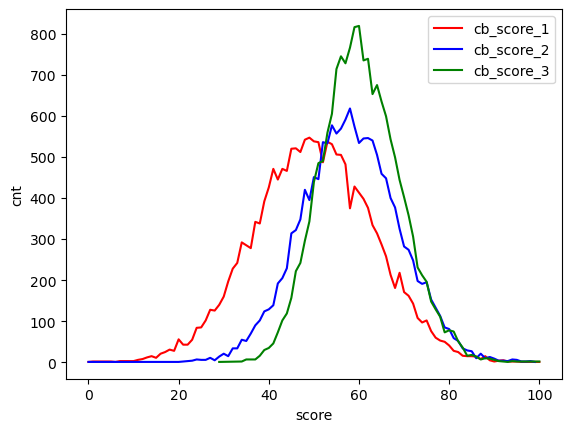

In [43]:
plt.xlabel('score')
plt.ylabel('cnt')
plt.plot(df[df['s1']!= -1].groupby('s1').count()['SK_ID_CURR'],color='red',label = 'cb_score_1')
plt.plot(df[df['s2']!= -1].groupby('s2').count()['SK_ID_CURR'],color='blue',label = 'cb_score_2')
plt.plot(df[df['s3']!= -1].groupby('s3').count()['SK_ID_CURR'],color='green',label = 'cb_score_3')
plt.legend()
plt.show()

>- null 값 제거시 등급분포는 정규분포를 따름<br>
>- 등급별 연체율을 알아보자.

In [44]:
a1 = pd.DataFrame(columns = ['s1_dflt','s2_dflt','s3_dflt'],index=range(-1,101))

In [45]:
for i in a1.index:
    if  df[df['s1']== i].shape[0] == 0:
        a1['s1_dflt'].loc[i] = 0.00
    else :
        a1['s1_dflt'].loc[i] = round(df[(df['s1']== i)&(df['TARGET']== 1)].shape[0] / df[df['s1']== i].shape[0],2)
        
    if  df[df['s2']== i].shape[0] == 0:
        a1['s2_dflt'].loc[i] = 0.00
    else :
        a1['s2_dflt'].loc[i] = round(df[(df['s2']== i)&(df['TARGET']== 1)].shape[0] / df[df['s2']== i].shape[0],2)
        
    if  df[df['s3']== i].shape[0] == 0:
        a1['s3_dflt'].loc[i] = 0.00
    else :
        a1['s3_dflt'].loc[i] = round(df[(df['s3']== i)&(df['TARGET']== 1)].shape[0] / df[df['s3']== i].shape[0],2)      

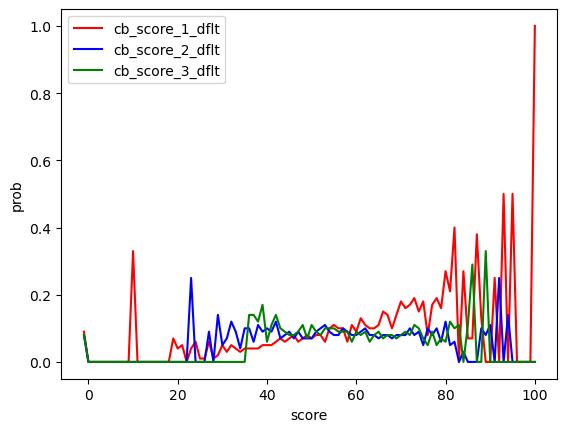

In [45]:
plt.xlabel('score')
plt.ylabel('prob')
plt.plot(a1['s1_dflt'],color='red',label = 'cb_score_1_dflt')
plt.plot(a1['s2_dflt'],color='blue',label = 'cb_score_2_dflt')
plt.plot(a1['s3_dflt'],color='green',label = 'cb_score_3_dflt')
plt.legend()
plt.show()

>- 1점단위로 나눠서 연체율이 들쭉날쭉이긴하지만, 구간화 잘하면 어느정도 클러스트링 가능할듯
>- 점수가 높을수록 연체비중이 높음. 점수가 높은게 안좋은 듯 <br>


In [46]:
a2 = pd.DataFrame(columns = ['s1_dflt','s2_dflt','s3_dflt'],index=range(-1,11))

In [47]:
for i in a2.index:
    print((i-1)*10,"~",i*10)
    if  df[(df['s1']> (i-1)*10)&(df['s1']<= i*10)].shape[0] == 0:
        a2['s1_dflt'].loc[i] = 0.00
    else :
        a2['s1_dflt'].loc[i] = round(df[(df['s1']> (i-1)*10)&(df['s1']<= i*10)&(df['TARGET']== 1)].shape[0] / df[(df['s1']> (i-1)*10)&(df['s1']<= i*10)].shape[0],4)
        
    if  df[(df['s2']> (i-1)*10)&(df['s2']<= i*10)].shape[0] == 0:
        a2['s2_dflt'].loc[i] = 0.00
    else :
        a2['s2_dflt'].loc[i] = round(df[(df['s2']> (i-1)*10)&(df['s2']<= i*10)&(df['TARGET']== 1)].shape[0] / df[(df['s2']> (i-1)*10)&(df['s2']<= i*10)].shape[0],4)
        
    if  df[(df['s3']> (i-1)*10)&(df['s3']<= i*10)].shape[0] == 0:
        a2['s3_dflt'].loc[i] = 0.00
    else :
        a2['s3_dflt'].loc[i] = round(df[(df['s3']> (i-1)*10)&(df['s3']<= i*10)&(df['TARGET']== 1)].shape[0] / df[(df['s3']> (i-1)*10)&(df['s3']<= i*10)].shape[0],4)


-20 ~ -10
-10 ~ 0
0 ~ 10
10 ~ 20
20 ~ 30
30 ~ 40
40 ~ 50
50 ~ 60
60 ~ 70
70 ~ 80
80 ~ 90
90 ~ 100


In [48]:
a2

,s1_dflt,s2_dflt,s3_dflt
-1,0.0,0.0,0.0
0,0.0901,0.0811,0.0777
1,0.0526,0.0,0.0
2,0.0188,0.0,0.0
3,0.0321,0.0676,0.0
4,0.0424,0.0879,0.1058
5,0.0652,0.0799,0.0942
6,0.0898,0.0898,0.0887
7,0.1222,0.0824,0.0782
8,0.167,0.0838,0.082


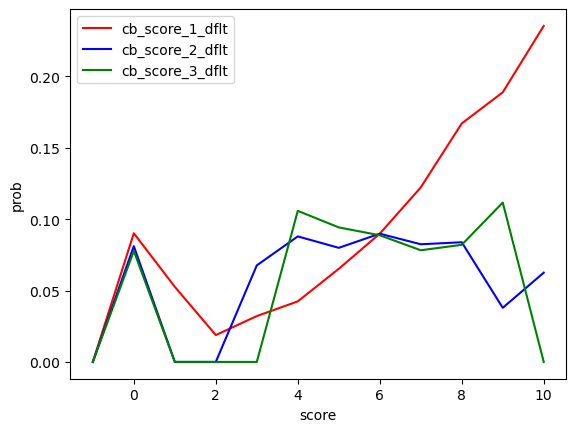

In [49]:
plt.xlabel('score')
plt.ylabel('prob')
plt.plot(a2['s1_dflt'],color='red',label = 'cb_score_1_dflt')
plt.plot(a2['s2_dflt'],color='blue',label = 'cb_score_2_dflt')
plt.plot(a2['s3_dflt'],color='green',label = 'cb_score_3_dflt')
plt.legend()
plt.show()

> 10구간시 확실히 cb_score_1은 줄을 잘서는 모습

#### 1.2.2 EDA-⑤ 거주지등급 변수 검토

In [50]:
df['REGION_RATING_CLIENT'].describe()

count    24000.000000
mean         2.051833
std          0.511525
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: REGION_RATING_CLIENT, dtype: float64

In [51]:
df.groupby('REGION_RATING_CLIENT').count()['SK_ID_CURR']

REGION_RATING_CLIENT
1     2550
2    17656
3     3794
Name: SK_ID_CURR, dtype: int64

#### 1.2.2 EDA-⑥ 금액 변수 검토

> 'AMT_INCOME_TOTAL' 수입 컬럼 보기

In [52]:
round(df['AMT_INCOME_TOTAL'].describe())

count        24000.0
mean        172518.0
std         760460.0
min          27000.0
25%         112500.0
50%         144000.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

> 평균 17만USD 인데, 중위수가 14만 달러/ 최대값이 1억달러(한화 1,536억) 넘는걸로 보아 이상치가 있음

{'whiskers': [<matplotlib.lines.Line2D at 0x272f72d1e50>,
 'caps': [<matplotlib.lines.Line2D at 0x272f7fe5690>,
 'boxes': [<matplotlib.lines.Line2D at 0x272f736b050>],
 'medians': [<matplotlib.lines.Line2D at 0x272f7fe6a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x272f7fe7190>],
 'means': []}

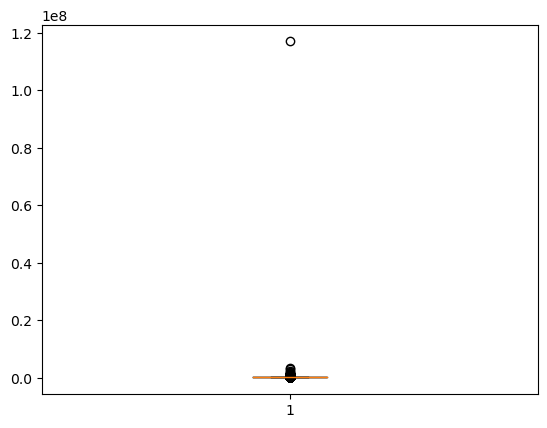

In [53]:
plt.boxplot(round(df['AMT_INCOME_TOTAL']))

> boxplot 확인시, 한건 확실한 이상치
> 이상치 평균값으로 대체

In [54]:
df['ADJ_AMT_INCOME_TOTAL'] = round(df['AMT_INCOME_TOTAL'],0) ##컬럼복사

count        24000.0
mean        172518.0
std         760460.0
min          27000.0
25%         112500.0
50%         144000.0
75%         202500.0
max      117000000.0
Name: ADJ_AMT_INCOME_TOTAL, dtype: float64


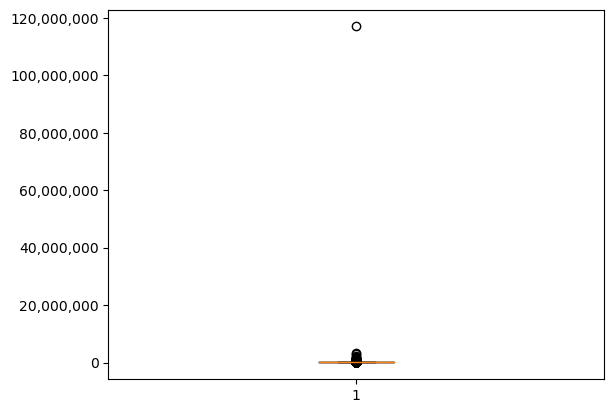

In [55]:
print(round(df['ADJ_AMT_INCOME_TOTAL'].describe(),0))
plt.boxplot(round(df['ADJ_AMT_INCOME_TOTAL']))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

> 이상치 제거해도 박스 범위 벗어나는 건들이 많음.박스범위 내와 이외의 값들로 나눠서 보는 것도 좋을듯

<Axes: >

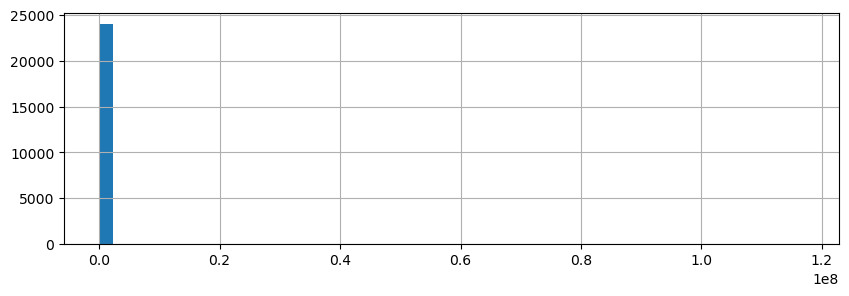

In [56]:
round(df['ADJ_AMT_INCOME_TOTAL']).hist(bins=50, figsize=(10,3))

> histogram 봐도 많이 치우쳐있음

In [57]:
# 비중별 금액을 확인해보자
print("30%:",df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.30))
print("50%:",df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.50))
print("75%:",df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.75))
print("90%:",df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.90))
print("95%:",df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.95))

30%: 112500.0
50%: 144000.0
75%: 202500.0
90%: 270000.0
95%: 337500.0


{'whiskers': [<matplotlib.lines.Line2D at 0x272f8037f50>,
 'caps': [<matplotlib.lines.Line2D at 0x272f9006b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x272f9005110>],
 'medians': [<matplotlib.lines.Line2D at 0x272f9007c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x272f9006890>],
 'means': []}

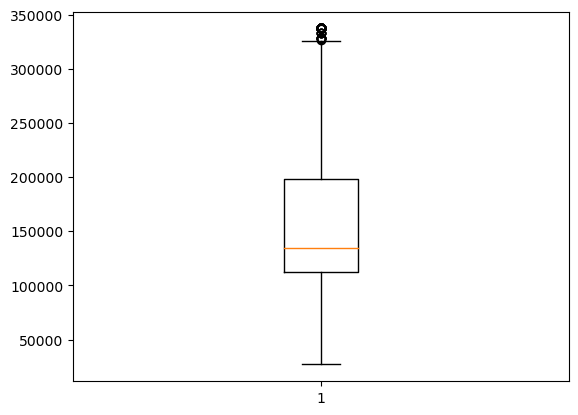

In [58]:
##상위 5%만 제거해보자
plt.boxplot(df[df['ADJ_AMT_INCOME_TOTAL']<=df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.95)]['ADJ_AMT_INCOME_TOTAL'] )

<Axes: >

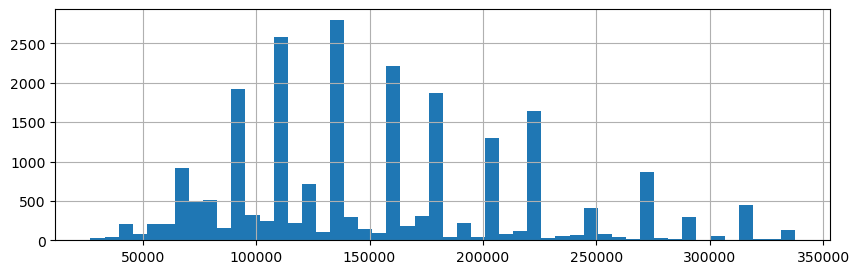

In [59]:
df[df['ADJ_AMT_INCOME_TOTAL']<=df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.95)]['ADJ_AMT_INCOME_TOTAL'].hist(bins=50, figsize=(10,3))

>- 상위 10% 제거해도 고른 분포가 나옴. <b4>
>- 하지만 상위 10% 수입도 의미있는 숫자일 수 있기 때문에 max값으로 설정해두기

In [60]:
# cleansing4 : 상위 10% 값은 max 값으로 설정
df.loc[df['ADJ_AMT_INCOME_TOTAL'] >= df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.95), 'ADJ_AMT_INCOME_TOTAL'] = round(df.loc[df['ADJ_AMT_INCOME_TOTAL'] <= df['ADJ_AMT_INCOME_TOTAL'].quantile(q=0.95), 'ADJ_AMT_INCOME_TOTAL'].mean())

#### 1.2.2 EDA-⑦ 대출신청 시간, 요일 검토

> WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START 검토

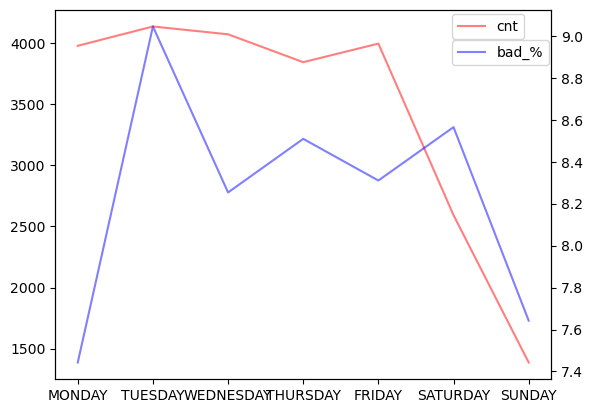

In [61]:
weekday_order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
Week_day = pd.DataFrame(df.pivot_table('SK_ID_CURR',index='WEEKDAY_APPR_PROCESS_START',columns='TARGET',aggfunc='count')).reindex(weekday_order).reset_index()
#.plot(figsize=(15,5))
fig, ax1 = plt.subplots()
ax1.plot(Week_day['WEEKDAY_APPR_PROCESS_START'], (Week_day[0]+Week_day[1]), color='red', label='cnt' ,alpha=0.5)
ax2=ax1.twinx()
ax2.plot(Week_day['WEEKDAY_APPR_PROCESS_START'], Week_day[1]/(Week_day[0]+Week_day[1])*100, color='blue', label='bad_%', alpha=0.5)
#ax2.set_ylabel( Week_day[1], color='blue', rotation=0)
#ax2.set_ylim(0,200)
#plt.legend(loc=1)oc=1)
ax1.legend(loc=(0.8, 0.92))
ax2.legend(loc=(0.8, 0.85))
plt.show()

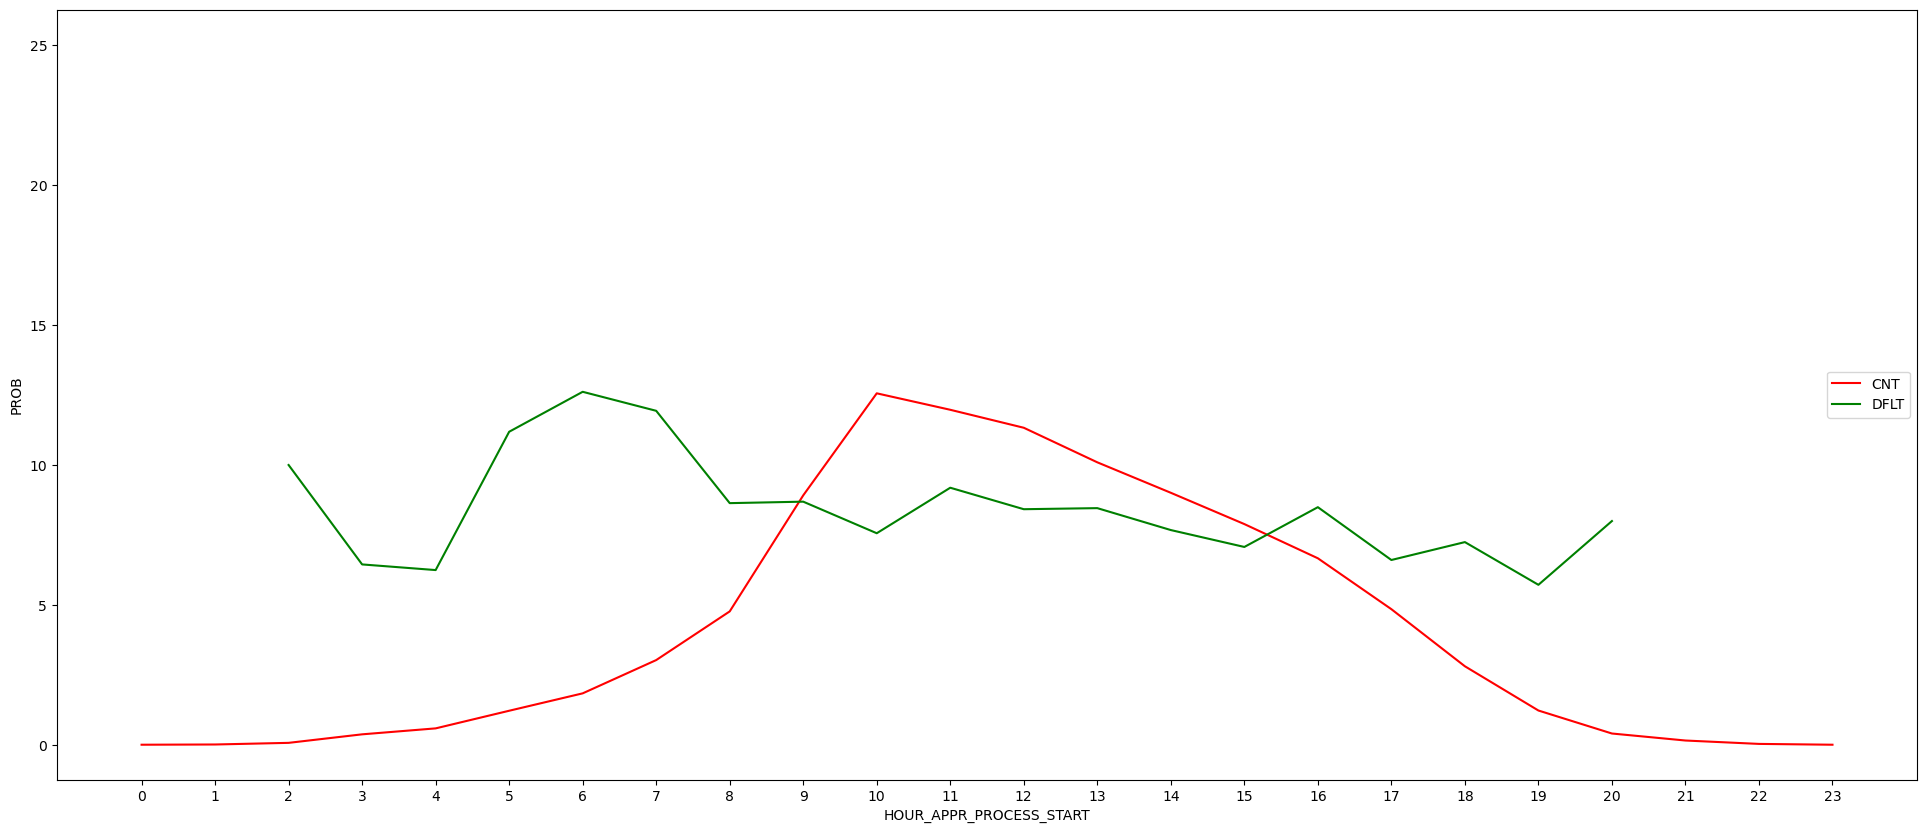

In [62]:
plt.figure(figsize=(24, 10))

plt.xlabel('HOUR_APPR_PROCESS_START')
plt.ylabel('PROB')
plt.xticks(np.arange(0,24,1))
plt.plot(df.groupby('HOUR_APPR_PROCESS_START').count()['SK_ID_CURR']/df.count()['SK_ID_CURR']*100,color='red',label = 'CNT')
plt.plot( df[df['TARGET']==1].groupby('HOUR_APPR_PROCESS_START').count()['SK_ID_CURR']/df.groupby('HOUR_APPR_PROCESS_START').count()['SK_ID_CURR']*100,color='GREEN',label = 'DFLT')

plt.legend()
plt.show()

► 은행업무시간(8시~18시)에 21813건 약 90.8% 비중을 차지함

▶ 시간대 구간을  나눠보자

In [63]:
df['PROCESS_TIME'] = ' '
for i in range(df.shape[0]) : 
    if df['HOUR_APPR_PROCESS_START'].iloc[i] <= 7 :
        df['PROCESS_TIME'].iloc[i] = '0-7'
    elif df['HOUR_APPR_PROCESS_START'].iloc[i] <= 18 :
        df['PROCESS_TIME'].iloc[i] = '7-18'
    else :
        df['PROCESS_TIME'].iloc[i] = '18-23'

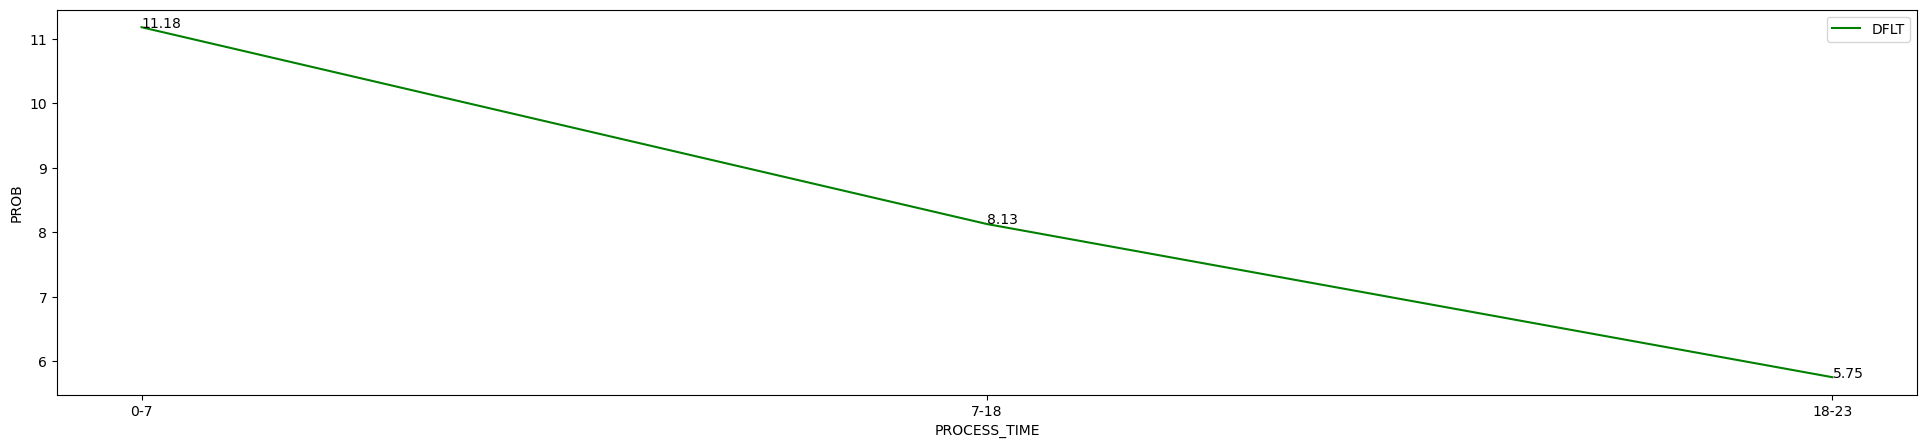

In [64]:
time_order = [ '0-7','7-18',  '18-23']
df_agg2 = df.groupby('PROCESS_TIME').count()['SK_ID_CURR']
df_dflt2 = df[df['TARGET']==1].groupby('PROCESS_TIME').count()['SK_ID_CURR']
df_agg2 = df_agg2.loc[time_order]
df_dflt2 = df_dflt2.loc[time_order]
dflt_prob = df_dflt2/df_agg2*100

plt.figure(figsize=(24, 5))

for i in range(len(time_order)):
    plt.text(time_order[i],dflt_prob[i],round(dflt_prob[i],2))
plt.xlabel('PROCESS_TIME')
plt.ylabel('PROB')
plt.xticks(np.arange(0,24,1))
# plt.plot(df_agg2/df.count()['SK_ID_CURR']*100,color='red',label = 'CNT')

plt.plot(dflt_prob,color='GREEN',label = 'DFLT')

plt.legend()
plt.show()

▶ 시간대별로 생각보다 줄이 잘섬

## 1.3 추가로 있으면 좋을만한 컬럼 생성

#### ▶ 신용관리팀에서 사용하는 cb변수 또는 지표 검토
- 가구당 평균 소득 = AMT_INCOME_TOTAL(소득금액) ÷ CNT_CHILDREN(자녀수+1 또는 2)   ← 이혼 여부,주거형태(With parent)에 따라!
- DTI(총부채상환비율) =  AMT_CREDIT(신용대출금액) ÷ AMT_INCOME_TOTAL(소득금액)  ← 소득금액은 아마 연단위겠지만, 신용대출금액 만기는 모르니까 일단 되는대로
- 능력1 근무일수대비 소득금액: AMT_INCOME_TOTAL(소득금액) / DAYS_EMPOLYED(근무일수)
- 능력2 무소득일수: DAYS_BIRTH(일단위나이) -  DAYS_EMPOLYED(근무일수) /365


In [65]:
# 가구당 평균소득 : AVG_INCOME
df['AVG_INCOME'] = 0
df['FAMILY_MEMBERS'] = 0
for i in range(df.shape[0]):
    if df.iloc[i]['NAME_FAMILY_STATUS']in ["Separated","Widow","Single / not married", "Unknown"] :
        df['FAMILY_MEMBERS'].iloc[i] = 1 
    else : 
        df['FAMILY_MEMBERS'].iloc[i] = 2
df.loc[df['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS'] = df.loc[df['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS']+2
df['FAMILY_MEMBERS'] = df['FAMILY_MEMBERS'] + df['CNT_CHILDREN']
df['AVG_INCOME'] = round(df['ADJ_AMT_INCOME_TOTAL']/df['FAMILY_MEMBERS'],0)

<Axes: >

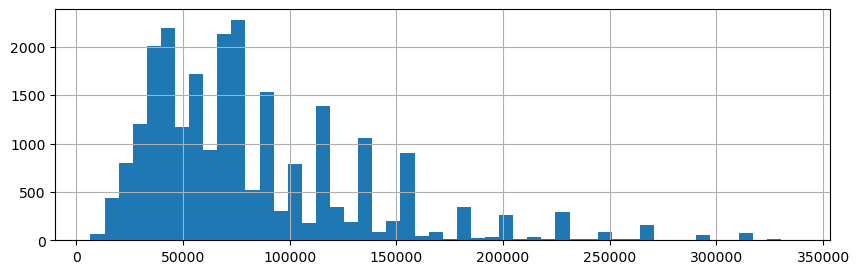

In [66]:
round(df['AVG_INCOME']).hist(bins=50, figsize=(10,3))

In [67]:
# DTI(총부채상환비율) =  AMT_CREDIT(신용대출금액) ÷ AMT_INCOME_TOTAL(소득금액)
df['DTI'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

<Axes: >

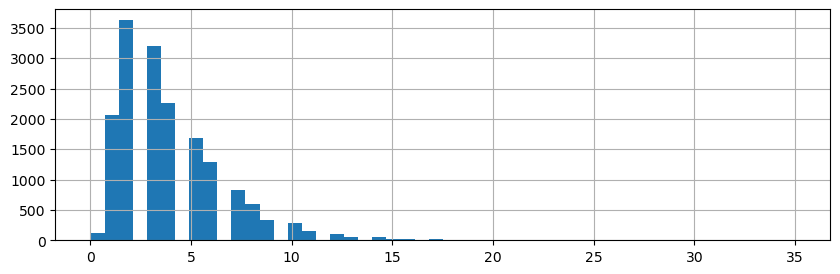

In [68]:
round(df['DTI']).hist(bins=50, figsize=(10,3))

In [69]:
# 능력1 근무일수대비 소득금액: AMT_INCOME_TOTAL(소득금액) / YEAR_EMPLOYED(근무일수)
df['ability1'] = round(df['AMT_INCOME_TOTAL'] / abs(df['DAYS_EMPLOYED']),0)
# 능력2 무소득일수: (DAYS_BIRTH(일단위나이) -  DAYS_EMPOLYED(근무일수) )/365

df['ability2'] = round(df['YEAR_BIRTH'] - df['YEAR_EMPLOYED'],0)

# 2 데이터전처리함수

In [70]:
df_loan_customer = pd.read_csv("loan_customer.csv", encoding="cp949")

## 2.1 EDA를 통한 전처리함수 : V1

### ▶ 전처리 내용 ◀
1. 범주형 변수 : none 처리 이후 OrdinalEncoder, make_dummy 로 변수변경
    - CODE_GENDER : 'XNA'로 된 이상 데이터 None처리
    - NAME_INCOME_TYPE : 'Businessman', 'Working' 불필요하게 나눠진 범주 통합
    - ORGANIZATION_TYPE
         - NAME_INCOME_TYPE이 'Stuedent' 인데 근무회사가 있을 수 없음. None처리
         - NAME_INCOME_TYPE이 'Pensioner' 이면 'None'이 아니라 'Pensioner'로 변경
    - FLAG_OWN_REALTY : FLAG형 데이터로 처리
    - CNT_CHILDREN : 4명 이상은 4로 처리
    - HOUR_APPR_PROCESS_START : 시간대별로 재범주화 → 연체성향이 다른 새벽, 은행업무시간, 업무시간 이후 시간대로 구성
</br></br>
2. 날짜형 변수 : 연단위로 변경 
    - DAYS_EMPLOYED 1000년 이상 : Pensioner(연금수령자)로 근속년수 50년으로 변경
</br></br>
3. Score 변수 : 함수사용을 위해 int타입으로 변경 & s1,s2,s3로 생성
</br></br>
4. 금액 변수 : AMT_INCOME_TOTAL 이상치가 많음. 상위 5%는 95% 이내 금액의 max값으로 설정
</br></br>
5. 불필요 변수 삭제
    - FLAG_MOBIL(휴대폰보유여부) 모두 1로 변별력 없음

In [108]:
## 전처리VI
def transform1(x_test) :
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['REGION_POPULATION_RELATIVE','AMT_CREDIT','DAYS_BIRTH','DAYS_ID_PUBLISH'])    
    # cleansing1 : 범주형변수 이상치 처리
    x_test.loc[x_test['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = None
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Businessman', 'NAME_INCOME_TYPE'] = 'Working'
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Student', 'ORGANIZATION_TYPE'] = None
    x_test.loc[x_test['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = None
    # 자가보유여부 ,1,0으로 바꾸기
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0
    # 연금수령자의 직장정보는 연금수령자로 변경
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'ORGANIZATION_TYPE'] = "Pensioner"
    # 자녀수 4명 이상 4명으로
    x_test.loc[x_test['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4
    
    # cleansing2 : 일단위 변수 연단위로 변경
    ## DAYS_BIRTH : 연단위로 변경 → YEAR_BIRTH
    x_test['YEAR_BIRTH'] = round(abs(x_test['DAYS_BIRTH'])/365,0)
    x_test = x_test.drop(['DAYS_BIRTH'],axis = 1)
    x_test['YEAR_BIRTH'] = x_test['YEAR_BIRTH'].astype('int64')
    ## DAYS_EMPLOYED : 연단위로 변경 → YEAR_EMPLOYED
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'DAYS_EMPLOYED'] = x_test['DAYS_EMPLOYED'].max()    
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['DAYS_EMPLOYED'])
    x_test['YEAR_EMPLOYED'] = round(abs(x_test['DAYS_EMPLOYED'])/365,0)  
    x_test['YEAR_EMPLOYED'] = x_test['YEAR_EMPLOYED'].astype('int64')
    
    ## DAYS_REGISTRATION : 삭제 → YEAR_REGISTRATION
    x_test = x_test.drop(['DAYS_REGISTRATION'],axis = 1)
    ## DAYS_ID_PUBLISH : 연단위로 변경 → YEARS_ID_PUBLISH
    x_test['YEAR_ID_PUBLISH'] = round(abs(x_test['DAYS_ID_PUBLISH'])/365,1)
    x_test['YEAR_ID_PUBLISH'] = x_test['YEAR_ID_PUBLISH'].astype('int64')
    x_test = x_test.drop(['DAYS_ID_PUBLISH'],axis = 1)
    # 근속년수('YEAR_EMPLOYED') 이상치 변경 : 50년으로, 보통 연금수령자임 
    x_test.loc[x_test['YEAR_EMPLOYED'] >= 1000, 'YEAR_EMPLOYED'] = 50
    
    #  cleansing3 : 휴대폰보유여부 삭제
    x_test = x_test.drop(['FLAG_MOBIL'],axis = 1)
    #  cleansing4 : AMT_INCOME_TOTAL 다듬기 - 상위 95% 이상은 상위95% 값으로 MAX값처리
    x_test.loc[x_test['AMT_INCOME_TOTAL'] >= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95),'AMT_INCOME_TOTAL'] = round(x_test.loc[x_test['AMT_INCOME_TOTAL'] <= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95), 'AMT_INCOME_TOTAL'].mean())
    
    # cleansing4 : score int type으로 재생성 
    x_test.loc[x_test['CB_SCORE_1'].isnull()==True , 'CB_SCORE_1'] = -1
    x_test.loc[x_test['CB_SCORE_2'].isnull()==True , 'CB_SCORE_2'] = -1
    x_test.loc[x_test['CB_SCORE_3'].isnull()==True , 'CB_SCORE_3'] = -1
    x_test['s1'] = round(x_test['CB_SCORE_1'],0).astype('int')
    x_test['s2'] = round(x_test['CB_SCORE_2'],0).astype('int')
    x_test['s3'] = round(x_test['CB_SCORE_3'],0).astype('int')
    x_test = x_test.drop(['CB_SCORE_1'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_2'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_3'],axis = 1)

    # 재범주화
    x_test['PROCESS_TIME'] = ' '
    for i in range(x_test.shape[0]) : 
        if x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 7 :
            x_test['PROCESS_TIME'].iloc[i] = '0h-7h'
        elif x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 18 :
            x_test['PROCESS_TIME'].iloc[i] = '7h-18h'
        else :
            x_test['PROCESS_TIME'].iloc[i] = '18h-23h'
    x_test = x_test.drop(['HOUR_APPR_PROCESS_START'],axis = 1)         
            
    # 금액변수 형변환
    x_test['AMT_INCOME_TOTAL'] = x_test['AMT_INCOME_TOTAL'].astype('int64')
    x_test['AMT_CREDIT'] = x_test['AMT_CREDIT'].astype('int64')
    
    #범주너무 많은것은 OrdinalEncoder
    ord_list = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','PROCESS_TIME']
    ORD_encoder = OrdinalEncoder(ord_list)
    x_test[ord_list] = ORD_encoder.fit_transform(x_test[ord_list])
    
    x_test = pd.get_dummies(x_test, columns = ['CODE_GENDER','FLAG_OWN_REALTY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE'])
    
#     x_test = x_test.drop( ['CODE_GENDER','FLAG_OWN_REALTY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE'],axis = 1)
    
    return x_test

In [109]:
data_v1 = transform1(df_loan_customer)

In [110]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 5 to 23994
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SK_ID_CURR                          5692 non-null   int64  
 1   CNT_CHILDREN                        5692 non-null   int64  
 2   AMT_INCOME_TOTAL                    5692 non-null   int64  
 3   AMT_CREDIT                          5692 non-null   int64  
 4   NAME_INCOME_TYPE                    5692 non-null   int32  
 5   NAME_EDUCATION_TYPE                 5692 non-null   int32  
 6   NAME_FAMILY_STATUS                  5692 non-null   int32  
 7   NAME_HOUSING_TYPE                   5692 non-null   int32  
 8   REGION_POPULATION_RELATIVE          5692 non-null   float64
 9   DAYS_EMPLOYED                       5692 non-null   float64
 10  FLAG_EMP_PHONE                      5692 non-null   int64  
 11  FLAG_WORK_PHONE                     5692 n

## 2.2 신규변수 생성 후 전처리함수 : V2

### ▶ 전처리 내용 ◀
1. AVG_INCOME(평균 수입)
    - FAMILY_MEMBERS 변수 생성 : NAME_FAMILY_STATUS(결혼형태), CHILDREN_CNT(자녀수)로 가족 수 측정
    - AVG_INCOME = AMT_INCOME_TOTAL / FAMILY_MEMBERS
    </br></br>
2. DTI(총부채상환비율)
    - DTI = AMT_CREDIT / AMT_INCOME_TOTAL
    </br></br>
3. ability1(근속년수 대비 수입)
    - ability1 = AMT_INCOME_TOTAL/DAYS_EMPLOYED
    </br></br>
4. ability2(나이 대비 일하지 않은 연수)
    - ability2 = YEAR_BIRTH - YEAR_EMPLOYED

In [114]:
## 전처리V2
def transform2(x_test) :
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['REGION_POPULATION_RELATIVE','AMT_CREDIT','DAYS_BIRTH','DAYS_ID_PUBLISH'])    
    # cleansing 1-1: 범주형변수 이상치 처리
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Businessman', 'NAME_INCOME_TYPE'] = 'Working'
    x_test.loc[x_test['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = None
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Student', 'ORGANIZATION_TYPE'] = None
    x_test.loc[x_test['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = None
#     x_test.dropna(axis=0,how = 'any', subset=['NAME_INCOME_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'])
    # 자가보유여부 ,1,0으로 바꾸기
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0
    # 연금수령자의 직장정보는 연금수령자로 변경
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'ORGANIZATION_TYPE'] = "Pensioner"
    # 자녀수 4명 이상 4명으로
    x_test.loc[x_test['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4
    
    # cleansing2 : 일단위 변수 연단위로 변경
    ## DAYS_BIRTH : 연단위로 변경 → YEAR_BIRTH
    x_test['YEAR_BIRTH'] = round(abs(x_test['DAYS_BIRTH'])/365,0)
    x_test = x_test.drop(['DAYS_BIRTH'],axis = 1)
    x_test['YEAR_BIRTH'] = x_test['YEAR_BIRTH'].astype('int64')
    ## DAYS_EMPLOYED : 연단위로 변경 → YEAR_EMPLOYED
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'DAYS_EMPLOYED'] = x_test['DAYS_EMPLOYED'].max()    
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['DAYS_EMPLOYED'])
    x_test['YEAR_EMPLOYED'] = round(abs(x_test['DAYS_EMPLOYED'])/365,0)  
    x_test['YEAR_EMPLOYED'] = x_test['YEAR_EMPLOYED'].astype('int64')
    
    ## DAYS_REGISTRATION : 삭제 → YEAR_REGISTRATION
    x_test = x_test.drop(['DAYS_REGISTRATION'],axis = 1)
    ## DAYS_ID_PUBLISH : 연단위로 변경 → YEARS_ID_PUBLISH
    x_test['YEAR_ID_PUBLISH'] = round(abs(x_test['DAYS_ID_PUBLISH'])/365,1)
    x_test['YEAR_ID_PUBLISH'] = x_test['YEAR_ID_PUBLISH'].astype('int64')
    x_test = x_test.drop(['DAYS_ID_PUBLISH'],axis = 1)
    # 근속년수('YEAR_EMPLOYED') 이상치 변경 : 50년으로, 보통 연금수령자임 
    x_test.loc[x_test['YEAR_EMPLOYED'] >= 1000, 'YEAR_EMPLOYED'] = 50
    
    #  cleansing3 : 휴대폰보유여부 삭제
    x_test = x_test.drop(['FLAG_MOBIL'],axis = 1)
    #  cleansing4 : AMT_INCOME_TOTAL 다듬기 - 상위 95% 이상은 상위95% 값으로 MAX값처리
    x_test.loc[x_test['AMT_INCOME_TOTAL'] >= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95),'AMT_INCOME_TOTAL'] = round(x_test.loc[x_test['AMT_INCOME_TOTAL'] <= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95), 'AMT_INCOME_TOTAL'].mean())
    
    # cleansing5 : score int type으로 재생성 
    x_test.loc[x_test['CB_SCORE_1'].isnull()==True , 'CB_SCORE_1'] = -1
    x_test.loc[x_test['CB_SCORE_2'].isnull()==True , 'CB_SCORE_2'] = -1
    x_test.loc[x_test['CB_SCORE_3'].isnull()==True , 'CB_SCORE_3'] = -1
    x_test['s1'] = round(x_test['CB_SCORE_1'],0).astype('int')
    x_test['s2'] = round(x_test['CB_SCORE_2'],0).astype('int')
    x_test['s3'] = round(x_test['CB_SCORE_3'],0).astype('int')
    x_test = x_test.drop(['CB_SCORE_1'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_2'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_3'],axis = 1)
    
    # 재범주화
    x_test['PROCESS_TIME'] = ' '
    for i in range(x_test.shape[0]) : 
        if x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 7 :
            x_test['PROCESS_TIME'].iloc[i] = '0h-7h'
        elif x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 18 :
            x_test['PROCESS_TIME'].iloc[i] = '7h-18h'
        else :
            x_test['PROCESS_TIME'].iloc[i] = '18h-23h'
    x_test = x_test.drop(['HOUR_APPR_PROCESS_START'],axis = 1)         
            
    # 신규 컬럼 생상
    x_test['AVG_INCOME'] = 0
    x_test['FAMILY_MEMBERS'] = 0
    for i in range(x_test.shape[0]):
        if x_test.iloc[i]['NAME_FAMILY_STATUS']in ["Separated","Widow","Single / not married", "Unknown"] :
            x_test['FAMILY_MEMBERS'].iloc[i] = 1 
        else : 
            x_test['FAMILY_MEMBERS'].iloc[i] = 2
    x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS'] = x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS']+2
    x_test['FAMILY_MEMBERS'] = x_test['FAMILY_MEMBERS'] + x_test['CNT_CHILDREN']
    x_test['AVG_INCOME'] = round(x_test['AMT_INCOME_TOTAL']/x_test['FAMILY_MEMBERS'],0)
    x_test = x_test.drop(['FAMILY_MEMBERS'],axis = 1)

    # 금액변수 형변환
    x_test['AMT_INCOME_TOTAL'] = x_test['AMT_INCOME_TOTAL'].astype('int64')
    x_test['AMT_CREDIT'] = x_test['AMT_CREDIT'].astype('int64')
    
    
    x_test['DTI'] = 0
    x_test['ability1'] = 0
    x_test['ability2'] = 0
    
    x_test['DTI'] = round(x_test['AMT_CREDIT'] / x_test['AMT_INCOME_TOTAL'],0)
    x_test['ability1'] = round(x_test['AMT_INCOME_TOTAL'] / abs(x_test['DAYS_EMPLOYED']),0)
    x_test = x_test.drop(['DAYS_EMPLOYED'],axis = 1)
#     x_test.loc[x_test['ability1']==float('inf') , 'ability1'] = x_test.loc[x_test['ability1']==float('inf') , 'AMT_CREDIT'] #근속년수 0 이면 소득으로
    x_test['ability2'] = round(x_test['YEAR_BIRTH'] - x_test['YEAR_EMPLOYED'],0)
    
    x_test['DTI'] = x_test['DTI'].astype('int64')
    x_test['ability1'] = x_test['ability1'].astype('int64')
    x_test['ability2'] = x_test['ability2'].astype('int64')
    
    #범주너무 많은것은 OrdinalEncoder
    ord_list = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','PROCESS_TIME']
    ORD_encoder = OrdinalEncoder(ord_list)
    x_test[ord_list] = ORD_encoder.fit_transform(x_test[ord_list])
    
    x_test = pd.get_dummies(x_test, columns = ['CODE_GENDER','FLAG_OWN_REALTY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE'])
    
#     x_test = x_test.drop( ['CODE_GENDER','FLAG_OWN_REALTY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE'],axis = 1)
    
    return x_test


In [115]:
data_v2 = transform2(df_loan_customer)

In [116]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 5 to 23994
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SK_ID_CURR                          5692 non-null   int64  
 1   CNT_CHILDREN                        5692 non-null   int64  
 2   AMT_INCOME_TOTAL                    5692 non-null   int64  
 3   AMT_CREDIT                          5692 non-null   int64  
 4   NAME_INCOME_TYPE                    5692 non-null   int32  
 5   NAME_EDUCATION_TYPE                 5692 non-null   int32  
 6   NAME_FAMILY_STATUS                  5692 non-null   int32  
 7   NAME_HOUSING_TYPE                   5692 non-null   int32  
 8   REGION_POPULATION_RELATIVE          5692 non-null   float64
 9   FLAG_EMP_PHONE                      5692 non-null   int64  
 10  FLAG_WORK_PHONE                     5692 non-null   int64  
 11  FLAG_PHONE                          5692 n

> 전처리 후 남는 데이터 5,692

## 2.3 다중공선성 제거 후 전처리함수 : V3

### ▶ 전처리 내용 ◀
- 'AMT_INCOME_TOTAL','AMT_CREDIT' 삭제

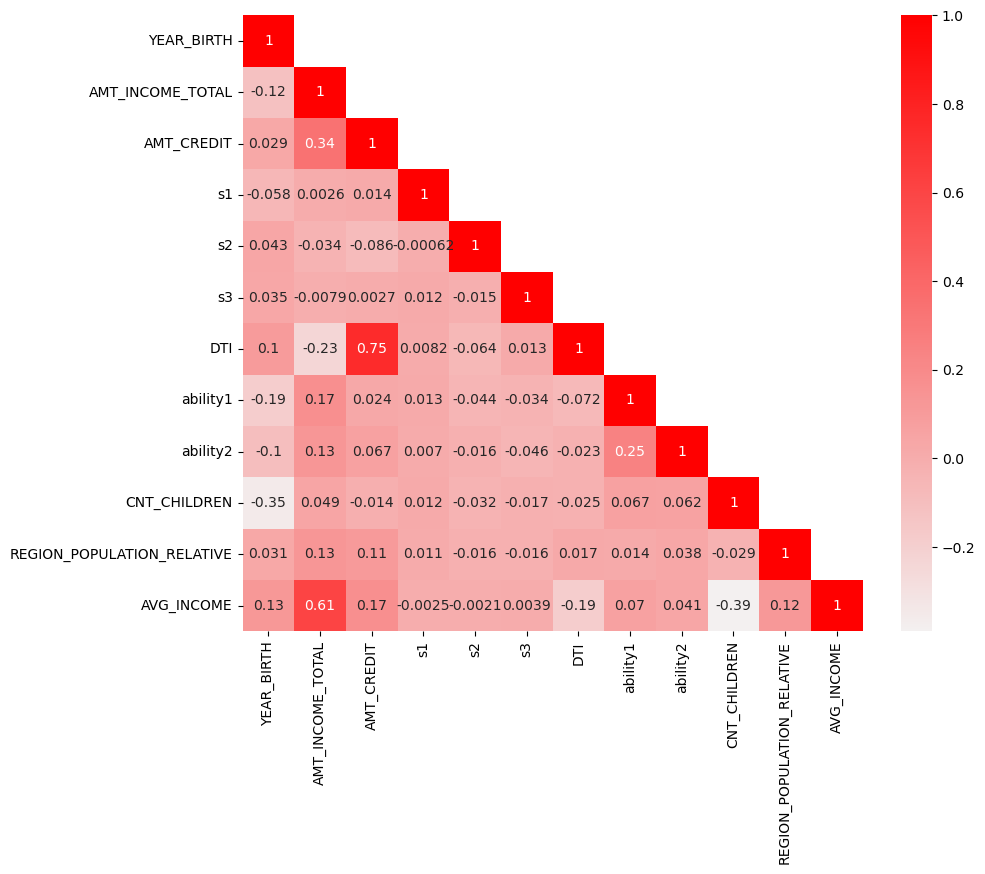

In [77]:
from statsmodels.datasets.longley import load_pandas

features  = ['YEAR_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT'
                ,'s1', 's2','s3', 'DTI', 'ability1','ability2','CNT_CHILDREN'
                ,'REGION_POPULATION_RELATIVE', 'AVG_INCOME']
dfy = pd.DataFrame(data_v2['TARGET'])
dfX = pd.DataFrame(data_v2[features],columns= features)
df_res = pd.concat([dfy, dfX], axis=1)

corr_M = dfX.corr() # 독립변수 상관관계
mask = np.array(corr_M)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize= (10,8))

sns.heatmap(corr_M, 
            cmap = sns.light_palette("red", as_cmap=True),
            annot = True, 
            mask = mask)

plt.show()

In [78]:
import statsmodels.api as sm
model = sm.OLS.from_formula("TARGET ~ "+ "+".join(features), data=df_res)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.350
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           6.94e-05
Time:                        13:51:28   Log-Likelihood:                -576.97
No. Observations:                5692   AIC:                             1180.
Df Residuals:                    5679   BIC:                             1266.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

> Notes [2]. The condition number is large  ▶ 다중공선성이 크단말!

> 새로운 변수를 생성하면서 사용한 AMT_INCOME_TOTAL, AMT_CREDIT 삭제

In [179]:
## 전처리V3
def transform3(x_test) :
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['REGION_POPULATION_RELATIVE','AMT_CREDIT','DAYS_BIRTH','DAYS_ID_PUBLISH'])    
    # cleansing 1-1: 범주형변수 이상치 처리
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Businessman', 'NAME_INCOME_TYPE'] = 'Working'
    x_test.loc[x_test['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = None
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Student', 'ORGANIZATION_TYPE'] = None
    x_test.loc[x_test['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = None
#     x_test.dropna(axis=0,how = 'any', subset=['NAME_INCOME_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'])
    # 자가보유여부 ,1,0으로 바꾸기
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0
    # 연금수령자의 직장정보는 연금수령자로 변경
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'ORGANIZATION_TYPE'] = "Pensioner"
    # 자녀수 4명 이상 4명으로
    x_test.loc[x_test['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4
    
    # cleansing2 : 일단위 변수 연단위로 변경
    ## DAYS_BIRTH : 연단위로 변경 → YEAR_BIRTH
    x_test['YEAR_BIRTH'] = round(abs(x_test['DAYS_BIRTH'])/365,0)
    x_test = x_test.drop(['DAYS_BIRTH'],axis = 1)
    x_test['YEAR_BIRTH'] = x_test['YEAR_BIRTH'].astype('int64')
    ## DAYS_EMPLOYED : 연단위로 변경 → YEAR_EMPLOYED
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'DAYS_EMPLOYED'] = x_test['DAYS_EMPLOYED'].max()    
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['DAYS_EMPLOYED'])
    x_test['YEAR_EMPLOYED'] = round(abs(x_test['DAYS_EMPLOYED'])/365,0)  
    x_test['YEAR_EMPLOYED'] = x_test['YEAR_EMPLOYED'].astype('int64')
    
    ## DAYS_REGISTRATION : 삭제 → YEAR_REGISTRATION
    x_test = x_test.drop(['DAYS_REGISTRATION'],axis = 1)
    ## DAYS_ID_PUBLISH : 연단위로 변경 → YEARS_ID_PUBLISH
    x_test['YEAR_ID_PUBLISH'] = round(abs(x_test['DAYS_ID_PUBLISH'])/365,1)
    x_test['YEAR_ID_PUBLISH'] = x_test['YEAR_ID_PUBLISH'].astype('int64')
    x_test = x_test.drop(['DAYS_ID_PUBLISH'],axis = 1)
    # 근속년수('YEAR_EMPLOYED') 이상치 변경 : 50년으로, 보통 연금수령자임 
    x_test.loc[x_test['YEAR_EMPLOYED'] >= 1000, 'YEAR_EMPLOYED'] = 50
    
    #  cleansing3 : 휴대폰보유여부 삭제
    x_test = x_test.drop(['FLAG_MOBIL'],axis = 1)
    #  cleansing4 : AMT_INCOME_TOTAL 다듬기 - 상위 95% 이상은 상위95% 값으로 MAX값처리
    x_test.loc[x_test['AMT_INCOME_TOTAL'] >= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95),'AMT_INCOME_TOTAL'] = round(x_test.loc[x_test['AMT_INCOME_TOTAL'] <= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95), 'AMT_INCOME_TOTAL'].mean())
    
    # cleansing5 : score int type으로 재생성 
    x_test.loc[x_test['CB_SCORE_1'].isnull()==True , 'CB_SCORE_1'] = -1
    x_test.loc[x_test['CB_SCORE_2'].isnull()==True , 'CB_SCORE_2'] = -1
    x_test.loc[x_test['CB_SCORE_3'].isnull()==True , 'CB_SCORE_3'] = -1
    x_test['s1'] = round(x_test['CB_SCORE_1'],0).astype('int')
    x_test['s2'] = round(x_test['CB_SCORE_2'],0).astype('int')
    x_test['s3'] = round(x_test['CB_SCORE_3'],0).astype('int')
    x_test = x_test.drop(['CB_SCORE_1'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_2'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_3'],axis = 1)
    
    # 재범주화
    x_test['PROCESS_TIME'] = ' '
    for i in range(x_test.shape[0]) : 
        if x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 7 :
            x_test['PROCESS_TIME'].iloc[i] = '0h-7h'
        elif x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 18 :
            x_test['PROCESS_TIME'].iloc[i] = '7h-18h'
        else :
            x_test['PROCESS_TIME'].iloc[i] = '18h-23h'
    x_test = x_test.drop(['HOUR_APPR_PROCESS_START'],axis = 1)         
            
    # 신규 컬럼 생상
    x_test['AVG_INCOME'] = 0
    x_test['FAMILY_MEMBERS'] = 0
    for i in range(x_test.shape[0]):
        if x_test.iloc[i]['NAME_FAMILY_STATUS']in ["Separated","Widow","Single / not married", "Unknown"] :
            x_test['FAMILY_MEMBERS'].iloc[i] = 1 
        else : 
            x_test['FAMILY_MEMBERS'].iloc[i] = 2
    x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS'] = x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS']+2
    x_test['FAMILY_MEMBERS'] = x_test['FAMILY_MEMBERS'] + x_test['CNT_CHILDREN']
    x_test['AVG_INCOME'] = round(x_test['AMT_INCOME_TOTAL']/x_test['FAMILY_MEMBERS'],0)
    x_test = x_test.drop(['FAMILY_MEMBERS'],axis = 1)

    # 금액변수 형변환
    x_test['AMT_INCOME_TOTAL'] = x_test['AMT_INCOME_TOTAL'].astype('int64')
    x_test['AMT_CREDIT'] = x_test['AMT_CREDIT'].astype('int64')
    
    
    x_test['DTI'] = 0
    x_test['ability1'] = 0
    x_test['ability2'] = 0
    
    x_test['DTI'] = round(x_test['AMT_CREDIT'] / x_test['AMT_INCOME_TOTAL'],0)
    x_test['ability1'] = round(x_test['AMT_INCOME_TOTAL'] / abs(x_test['DAYS_EMPLOYED']),0)
    x_test = x_test.drop(['DAYS_EMPLOYED'],axis = 1)
#     x_test.loc[x_test['ability1']==float('inf') , 'ability1'] = x_test.loc[x_test['ability1']==float('inf') , 'AMT_CREDIT'] #근속년수 0 이면 소득으로
    x_test['ability2'] = round(x_test['YEAR_BIRTH'] - x_test['YEAR_EMPLOYED'],0)
    
    x_test['DTI'] = x_test['DTI'].astype('int64')
    x_test['ability1'] = x_test['ability1'].astype('int64')
    x_test['ability2'] = x_test['ability2'].astype('int64')
    
    #범주너무 많은것은 OrdinalEncoder
    ord_list = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','PROCESS_TIME']
    ORD_encoder = OrdinalEncoder(ord_list)
    x_test[ord_list] = ORD_encoder.fit_transform(x_test[ord_list])
    
    x_test = pd.get_dummies(x_test, columns = ['CODE_GENDER','FLAG_OWN_REALTY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE'])
    
    #다중공선성 제거
    x_test = x_test.drop( ['AMT_INCOME_TOTAL','AMT_CREDIT'],axis = 1)
    
    return x_test


In [180]:
data_v3 = transform3(df_loan_customer)

In [81]:
data_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 5 to 23994
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SK_ID_CURR                          5692 non-null   int64  
 1   CNT_CHILDREN                        5692 non-null   int64  
 2   NAME_INCOME_TYPE                    5692 non-null   int32  
 3   NAME_EDUCATION_TYPE                 5692 non-null   int32  
 4   NAME_FAMILY_STATUS                  5692 non-null   int32  
 5   NAME_HOUSING_TYPE                   5692 non-null   int32  
 6   REGION_POPULATION_RELATIVE          5692 non-null   float64
 7   FLAG_EMP_PHONE                      5692 non-null   int64  
 8   FLAG_WORK_PHONE                     5692 non-null   int64  
 9   FLAG_PHONE                          5692 non-null   int64  
 10  FLAG_EMAIL                          5692 non-null   int64  
 11  WEEKDAY_APPR_PROCESS_START          5692 n

## 2.4 클러스트링 추가 후 전처리함수 : V4

> 클러스트링이 변별력을 높여줄 수 있으니 kmeans clustring 진행

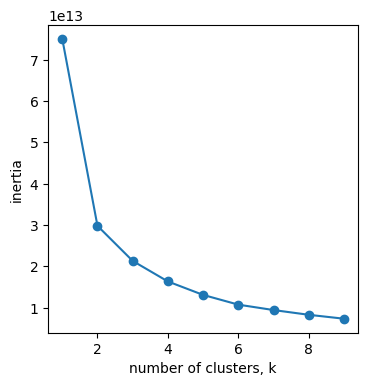

In [82]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)
aa = data_v3
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(aa)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [83]:
data_v4 = data_v3
model = KMeans(n_clusters=4)
model.fit(data_v4)

KMeans(n_clusters=4)

> k값은 완만해지는 4부터

In [84]:
## 전처리V4
def transform4(x_test) :
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['REGION_POPULATION_RELATIVE','AMT_CREDIT','DAYS_BIRTH','DAYS_ID_PUBLISH'])    
    # cleansing 1-1: 범주형변수 이상치 처리
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Businessman', 'NAME_INCOME_TYPE'] = 'Working'
    x_test.loc[x_test['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = None
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Student', 'ORGANIZATION_TYPE'] = None
    x_test.loc[x_test['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = None
#     x_test.dropna(axis=0,how = 'any', subset=['NAME_INCOME_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'])
    # 자가보유여부 ,1,0으로 바꾸기
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0
    # 연금수령자의 직장정보는 연금수령자로 변경
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'ORGANIZATION_TYPE'] = "Pensioner"
    # 자녀수 4명 이상 4명으로
    x_test.loc[x_test['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4
    
    # cleansing2 : 일단위 변수 연단위로 변경
    ## DAYS_BIRTH : 연단위로 변경 → YEAR_BIRTH
    x_test['YEAR_BIRTH'] = round(abs(x_test['DAYS_BIRTH'])/365,0)
    x_test = x_test.drop(['DAYS_BIRTH'],axis = 1)
    x_test['YEAR_BIRTH'] = x_test['YEAR_BIRTH'].astype('int64')
    ## DAYS_EMPLOYED : 연단위로 변경 → YEAR_EMPLOYED
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'DAYS_EMPLOYED'] = x_test['DAYS_EMPLOYED'].max()    
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['DAYS_EMPLOYED'])
    x_test['YEAR_EMPLOYED'] = round(abs(x_test['DAYS_EMPLOYED'])/365,0)  
    x_test['YEAR_EMPLOYED'] = x_test['YEAR_EMPLOYED'].astype('int64')
    
    ## DAYS_REGISTRATION : 삭제 → YEAR_REGISTRATION
    x_test = x_test.drop(['DAYS_REGISTRATION'],axis = 1)
    ## DAYS_ID_PUBLISH : 연단위로 변경 → YEARS_ID_PUBLISH
    x_test['YEAR_ID_PUBLISH'] = round(abs(x_test['DAYS_ID_PUBLISH'])/365,1)
    x_test['YEAR_ID_PUBLISH'] = x_test['YEAR_ID_PUBLISH'].astype('int64')
    x_test = x_test.drop(['DAYS_ID_PUBLISH'],axis = 1)
    # 근속년수('YEAR_EMPLOYED') 이상치 변경 : 50년으로, 보통 연금수령자임 
    x_test.loc[x_test['YEAR_EMPLOYED'] >= 1000, 'YEAR_EMPLOYED'] = 50
    
    #  cleansing3 : 휴대폰보유여부 삭제
    x_test = x_test.drop(['FLAG_MOBIL'],axis = 1)
    #  cleansing4 : AMT_INCOME_TOTAL 다듬기 - 상위 95% 이상은 상위95% 값으로 MAX값처리
    x_test.loc[x_test['AMT_INCOME_TOTAL'] >= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95),'AMT_INCOME_TOTAL'] = round(x_test.loc[x_test['AMT_INCOME_TOTAL'] <= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95), 'AMT_INCOME_TOTAL'].mean())
    
    # cleansing5 : score int type으로 재생성 
    x_test.loc[x_test['CB_SCORE_1'].isnull()==True , 'CB_SCORE_1'] = -1
    x_test.loc[x_test['CB_SCORE_2'].isnull()==True , 'CB_SCORE_2'] = -1
    x_test.loc[x_test['CB_SCORE_3'].isnull()==True , 'CB_SCORE_3'] = -1
    x_test['s1'] = round(x_test['CB_SCORE_1'],0).astype('int')
    x_test['s2'] = round(x_test['CB_SCORE_2'],0).astype('int')
    x_test['s3'] = round(x_test['CB_SCORE_3'],0).astype('int')
    x_test = x_test.drop(['CB_SCORE_1'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_2'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_3'],axis = 1)
    
    # 재범주화

    x_test['PROCESS_TIME'] = ' '
    for i in range(x_test.shape[0]) : 
        if x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 7 :
            x_test['PROCESS_TIME'].iloc[i] = '0h-7h'
        elif x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 18 :
            x_test['PROCESS_TIME'].iloc[i] = '7h-18h'
        else :
            x_test['PROCESS_TIME'].iloc[i] = '18h-23h'
    x_test = x_test.drop(['HOUR_APPR_PROCESS_START'],axis = 1)         
    
    # 신규 컬럼 생상
    x_test['AVG_INCOME'] = 0
    x_test['FAMILY_MEMBERS'] = 0
    for i in range(x_test.shape[0]):
        if x_test.iloc[i]['NAME_FAMILY_STATUS']in ["Separated","Widow","Single / not married", "Unknown"] :
            x_test['FAMILY_MEMBERS'].iloc[i] = 1 
        else : 
            x_test['FAMILY_MEMBERS'].iloc[i] = 2
    x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS'] = x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS']+2
    x_test['FAMILY_MEMBERS'] = x_test['FAMILY_MEMBERS'] + x_test['CNT_CHILDREN']
    x_test['AVG_INCOME'] = round(x_test['AMT_INCOME_TOTAL']/x_test['FAMILY_MEMBERS'],0)
    x_test = x_test.drop(['FAMILY_MEMBERS'],axis = 1)

    # 금액변수 형변환
    x_test['AMT_INCOME_TOTAL'] = x_test['AMT_INCOME_TOTAL'].astype('int64')
    x_test['AMT_CREDIT'] = x_test['AMT_CREDIT'].astype('int64')
    
    
    x_test['DTI'] = 0
    x_test['ability1'] = 0
    x_test['ability2'] = 0
    
    x_test['DTI'] = round(x_test['AMT_CREDIT'] / x_test['AMT_INCOME_TOTAL'],0)
    x_test['ability1'] = round(x_test['AMT_INCOME_TOTAL'] / x_test['DAYS_EMPLOYED'],0)
    x_test = x_test.drop(['DAYS_EMPLOYED'],axis = 1)
#     x_test.loc[x_test['ability1']==float('inf') , 'ability1'] = x_test.loc[x_test['ability1']==float('inf') , 'AMT_CREDIT'] #근속년수 0 이면 소득으로
    x_test['ability2'] = round(x_test['YEAR_BIRTH'] - x_test['YEAR_EMPLOYED'],0)
    
    x_test['DTI'] = x_test['DTI'].astype('int64')
    x_test['ability1'] = x_test['ability1'].astype('int64')
    x_test['ability2'] = x_test['ability2'].astype('int64')
    
    #범주너무 많은것은 OrdinalEncoder
    ord_list = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','PROCESS_TIME']
    ORD_encoder = OrdinalEncoder(ord_list)
    x_test[ord_list] = ORD_encoder.fit_transform(x_test[ord_list])
    
    x_test = pd.get_dummies(x_test, columns = ['CODE_GENDER','FLAG_OWN_REALTY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE'])
    
    #클러스트링 추가
    kmeans = KMeans(n_clusters=4, random_state=42).fit(x_test)
    x_test['cluster'] = kmeans.predict(x_test)
    
    
    #다중공선성 제거
    x_test = x_test.drop( ['AMT_INCOME_TOTAL','AMT_CREDIT'],axis = 1)
    
    return x_test


In [85]:
data_v4 = transform4(df_loan_customer)

# 3. 예측결과 평가 측도

- AUC 참고 https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ko

In [86]:
## 사용법 : roc_auc_score(실제데이터, 예측데이터)
from sklearn.metrics import roc_auc_score

## 사용예시
eg = data_v1
eg['TARGET_XX'] = 1

print("▶ 모두 1로 넣었을 때, auc값 : ", roc_auc_score(eg['TARGET'], eg['TARGET_XX']))

▶ 모두 1로 넣었을 때, auc값 :  0.5


# 4. 버전별 모델링하기

## 4.1 모델링함수

**☆ 모델 요약** <br>
- train, test set 생성하여 성능 측정 <br>
- auc를 평가 측도로 모델 개발 <br>
- StratifiedKFold 활용하며 fold = 10<br> 
    : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식

In [89]:
# test 데이터가 따로 없으므로, 일단 test, train 분리
def Train_Test_split(data) :
    
    y = data['TARGET']
    X = data.drop(['TARGET'],axis = 1)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      random_state=777,
                                                      shuffle=True,
                                                      stratify=y)
    # drop = False로 설정하면 정리되기 전 인덱스가 새로운 컬럼으로 생성됩니다.
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    
    return x_train, x_test, y_train, y_test

In [90]:
## AUC 로 모델 정확도측정하는 CATBOOST 모델
def Auc_catboost(data,cat_cols,n_fold,seed) :
    
    target = 'TARGET'
    folds=[]
    
    X, X_test, y, y_test = Train_Test_split(data)
    
    X = X.drop(['SK_ID_CURR'],axis = 1)
    X_test = X_test.drop(['SK_ID_CURR'],axis = 1)
    
    
    n_class = y.unique().shape[0]
    skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

    for train_idx, valid_idx in skf.split(X, y):
            folds.append((train_idx, valid_idx))
            
    cat_pred = np.zeros((X.shape[0], n_class))
    cat_pred_test = np.zeros((X_test.shape[0], n_class))

    for fold in range(n_fold):
        print(f'\n----------------- Fold {fold} -----------------\n')
        train_idx, valid_idx = folds[fold]

        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
        train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
        valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

        model_cat = CatBoostClassifier(custom_loss= ['AUC'])
        model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)

        cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
        cat_pred_test += model_cat.predict_proba(X_test) / n_fold
        print(f'CV AUC Score: {roc_auc_score(y_valid, cat_pred[valid_idx][:, 1]) :.6f}')

    print(f'\tAUC Loss: {roc_auc_score(y_valid, cat_pred[valid_idx][:, 1]):.6f}')
    
    return [model_cat, cat_pred, cat_pred_test]

## 4.2 버전별 모델링 및 성능 측정

In [91]:
# V1 : 전처리만 했을 때
cat_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'PROCESS_TIME','ORGANIZATION_TYPE']
model_res1 = Auc_catboost(data = data_v1,cat_cols = cat_cols ,n_fold=11,seed=77) 


----------------- Fold 0 -----------------

Learning rate set to 0.045007
0:	learn: 0.6469294	test: 0.6474013	best: 0.6474013 (0)	total: 248ms	remaining: 4m 7s
100:	learn: 0.2352662	test: 0.2638700	best: 0.2624530 (80)	total: 5.63s	remaining: 50.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2624529686
bestIteration = 80

Shrink model to first 81 iterations.
CV AUC Score: 0.653550

----------------- Fold 1 -----------------

Learning rate set to 0.045007
0:	learn: 0.6470277	test: 0.6467860	best: 0.6467860 (0)	total: 58.2ms	remaining: 58.1s
100:	learn: 0.2341235	test: 0.2706700	best: 0.2678703 (63)	total: 5.57s	remaining: 49.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.267870327
bestIteration = 63

Shrink model to first 64 iterations.
CV AUC Score: 0.577225

----------------- Fold 2 -----------------

Learning rate set to 0.045007
0:	learn: 0.6471159	test: 0.6469466	best: 0.6469466 (0)	total: 64.4ms	remaining: 1m 4s
100:	learn: 0.2370

In [92]:
# V2 : 신규변수 생성시 성능 UP  
cat_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'PROCESS_TIME','ORGANIZATION_TYPE']
model_res2 = Auc_catboost(data = data_v2,cat_cols = cat_cols ,n_fold=11,seed=77) 


----------------- Fold 0 -----------------

Learning rate set to 0.045007
0:	learn: 0.6474926	test: 0.6472303	best: 0.6472303 (0)	total: 33.5ms	remaining: 33.5s
100:	learn: 0.2351465	test: 0.2622270	best: 0.2620418 (99)	total: 6.68s	remaining: 59.4s
200:	learn: 0.2061001	test: 0.2641543	best: 0.2616069 (105)	total: 13.2s	remaining: 52.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2616069295
bestIteration = 105

Shrink model to first 106 iterations.
CV AUC Score: 0.649051

----------------- Fold 1 -----------------

Learning rate set to 0.045007
0:	learn: 0.6475671	test: 0.6474894	best: 0.6474894 (0)	total: 37.1ms	remaining: 37.1s
100:	learn: 0.2359375	test: 0.2679154	best: 0.2677763 (74)	total: 6.02s	remaining: 53.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2677762999
bestIteration = 74

Shrink model to first 75 iterations.
CV AUC Score: 0.578043

----------------- Fold 2 -----------------

Learning rate set to 0.045007
0:	learn: 0

In [93]:
# V3 : 다중공선성 제거시 성능 UP
cat_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'PROCESS_TIME','ORGANIZATION_TYPE']
model_res3 = Auc_catboost(data = data_v3,cat_cols = cat_cols ,n_fold=11,seed=77) 


----------------- Fold 0 -----------------

Learning rate set to 0.045007
0:	learn: 0.6474371	test: 0.6472827	best: 0.6472827 (0)	total: 28.3ms	remaining: 28.3s
100:	learn: 0.2376300	test: 0.2648722	best: 0.2643213 (70)	total: 4.93s	remaining: 43.9s
200:	learn: 0.2091350	test: 0.2649707	best: 0.2628972 (171)	total: 10.4s	remaining: 41.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2628971772
bestIteration = 171

Shrink model to first 172 iterations.
CV AUC Score: 0.648560

----------------- Fold 1 -----------------

Learning rate set to 0.045007
0:	learn: 0.6469131	test: 0.6474967	best: 0.6474967 (0)	total: 67.2ms	remaining: 1m 7s
100:	learn: 0.2360346	test: 0.2704731	best: 0.2694551 (67)	total: 6.17s	remaining: 54.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2694550953
bestIteration = 67

Shrink model to first 68 iterations.
CV AUC Score: 0.565527

----------------- Fold 2 -----------------

Learning rate set to 0.045007
0:	learn: 0

In [94]:
# V4 : 클러스트링 효과는 크게 없는 듯 -- V3 까지만 하자우
cat_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'PROCESS_TIME','ORGANIZATION_TYPE','cluster']
model_res4 = Auc_catboost(data = data_v4,cat_cols = cat_cols ,n_fold=11,seed=77) 


----------------- Fold 0 -----------------

Learning rate set to 0.045007
0:	learn: 0.6473397	test: 0.6471724	best: 0.6471724 (0)	total: 65.8ms	remaining: 1m 5s
100:	learn: 0.2373309	test: 0.2635388	best: 0.2634509 (98)	total: 5.64s	remaining: 50.2s
200:	learn: 0.2072641	test: 0.2670107	best: 0.2630362 (102)	total: 12.1s	remaining: 48.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2630361931
bestIteration = 102

Shrink model to first 103 iterations.
CV AUC Score: 0.638662

----------------- Fold 1 -----------------

Learning rate set to 0.045007
0:	learn: 0.6473562	test: 0.6471058	best: 0.6471058 (0)	total: 85ms	remaining: 1m 24s
100:	learn: 0.2384921	test: 0.2690181	best: 0.2683809 (61)	total: 5.66s	remaining: 50.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2683808504
bestIteration = 61

Shrink model to first 62 iterations.
CV AUC Score: 0.579352

----------------- Fold 2 -----------------

Learning rate set to 0.045007
0:	learn: 0.

# 5. 변수중요도

### 5.1 변수중요도 함수

In [96]:
def plot_feature_importance(importance,names,model_type):
    
#     feature_importance = 
#     feature_names = 
    
    data={'feature_names':np.array(names),'feature_importance':np.array(importance)}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

### 5.2 버전별 변수중요도 측정 및 해석

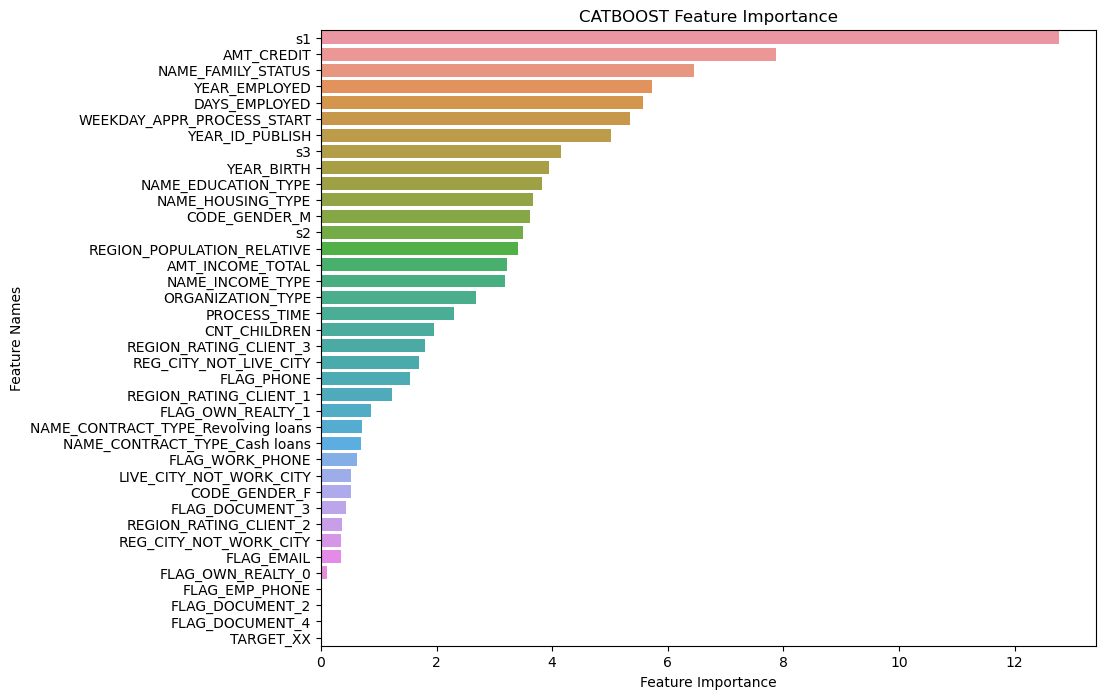

In [97]:
model_cat1 = model_res1[0]
plot_feature_importance(model_cat1.get_feature_importance(),data_v1.drop(['SK_ID_CURR','TARGET'],axis=1).columns,'CATBOOST')

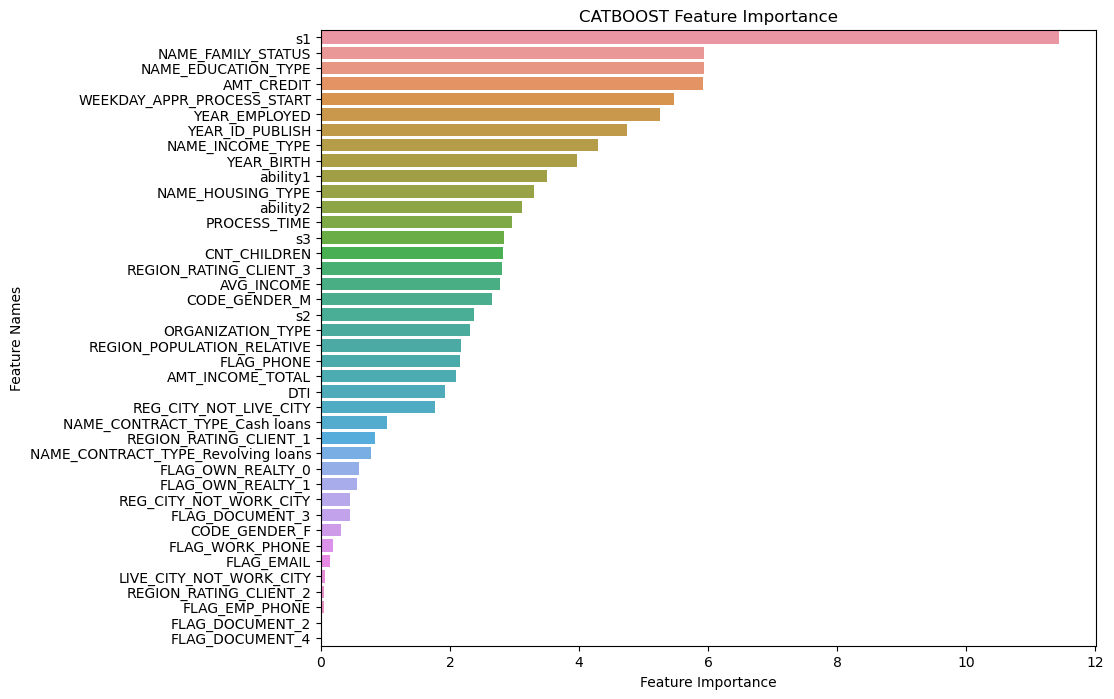

In [98]:
model_cat2 = model_res2[0]
plot_feature_importance(model_cat2.get_feature_importance(),data_v2.drop(['SK_ID_CURR','TARGET'],axis=1).columns,'CATBOOST')

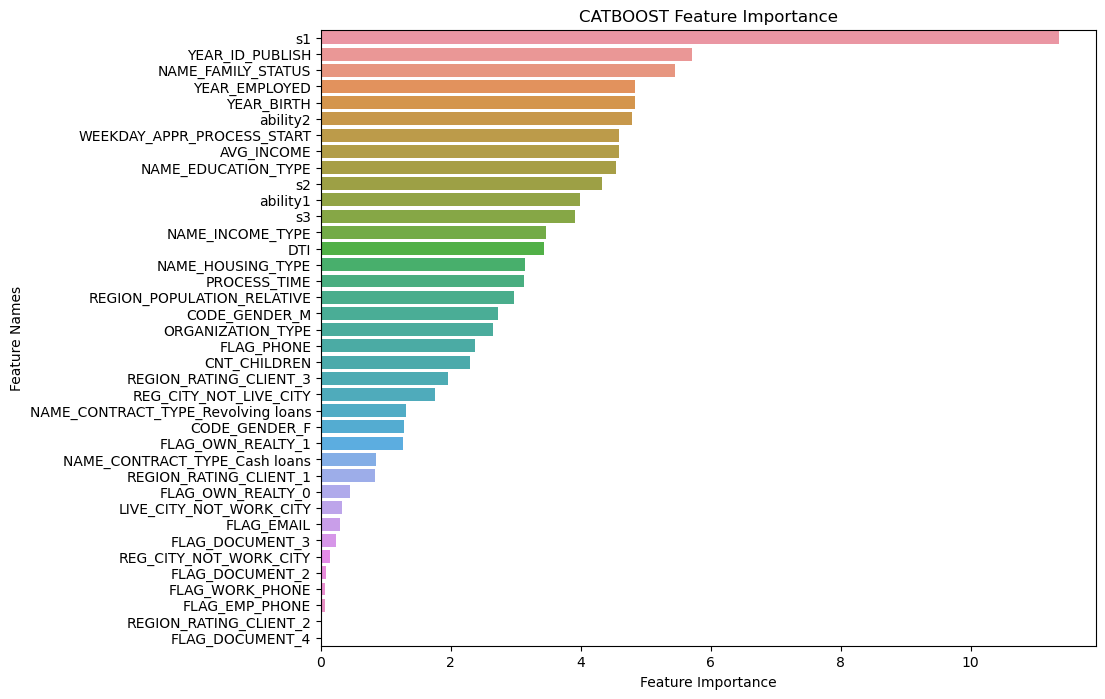

In [99]:
model_cat3 = model_res3[0]
plot_feature_importance(model_cat3.get_feature_importance(),data_v3.drop(['SK_ID_CURR','TARGET'],axis=1).columns,'CATBOOST')

## 6. 최종 결과물

### 6.1 전처리함수

In [189]:
## 전처리V3
def test_transform_function(x_test) :
    #x_test = x_test.dropna(axis = 0, how= 'any', subset=['REGION_POPULATION_RELATIVE','AMT_CREDIT','DAYS_BIRTH','DAYS_ID_PUBLISH'])    
    # cleansing 1-1: 범주형변수 이상치 처리
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Businessman', 'NAME_INCOME_TYPE'] = 'Working'
    x_test.loc[x_test['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = None
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Student', 'ORGANIZATION_TYPE'] = None
    x_test.loc[x_test['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = None
#     x_test.dropna(axis=0,how = 'any', subset=['NAME_INCOME_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'])
    # 자가보유여부 ,1,0으로 바꾸기
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
    x_test.loc[x_test['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0
    # 연금수령자의 직장정보는 연금수령자로 변경
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'ORGANIZATION_TYPE'] = "Pensioner"
    # 자녀수 4명 이상 4명으로
    x_test.loc[x_test['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4
    
    # cleansing2 : 일단위 변수 연단위로 변경
    ## DAYS_BIRTH : 연단위로 변경 → YEAR_BIRTH
    x_test['YEAR_BIRTH'] = round(abs(x_test['DAYS_BIRTH'])/365,0)
    x_test = x_test.drop(['DAYS_BIRTH'],axis = 1)
#     x_test['YEAR_BIRTH'] = x_test['YEAR_BIRTH'].astype('int64')
    ## DAYS_EMPLOYED : 연단위로 변경 → YEAR_EMPLOYED
    x_test.loc[x_test['NAME_INCOME_TYPE'] == 'Pensioner', 'DAYS_EMPLOYED'] = x_test['DAYS_EMPLOYED'].max()    
    x_test = x_test.dropna(axis = 0, how= 'any', subset=['DAYS_EMPLOYED'])
    x_test['YEAR_EMPLOYED'] = round(abs(x_test['DAYS_EMPLOYED'])/365,0)  
    x_test['YEAR_EMPLOYED'] = x_test['YEAR_EMPLOYED'].astype('int64')
    
    ## DAYS_REGISTRATION : 삭제 → YEAR_REGISTRATION
    x_test = x_test.drop(['DAYS_REGISTRATION'],axis = 1)
    ## DAYS_ID_PUBLISH : 연단위로 변경 → YEARS_ID_PUBLISH
    x_test['YEAR_ID_PUBLISH'] = round(abs(x_test['DAYS_ID_PUBLISH'])/365,1)
#     x_test['YEAR_ID_PUBLISH'] = x_test['YEAR_ID_PUBLISH'].astype('int64')
    x_test = x_test.drop(['DAYS_ID_PUBLISH'],axis = 1)
    # 근속년수('YEAR_EMPLOYED') 이상치 변경 : 50년으로, 보통 연금수령자임 
    x_test.loc[x_test['YEAR_EMPLOYED'] >= 1000, 'YEAR_EMPLOYED'] = 50
    
    #  cleansing3 : 휴대폰보유여부 삭제
    x_test = x_test.drop(['FLAG_MOBIL'],axis = 1)
    #  cleansing4 : AMT_INCOME_TOTAL 다듬기 - 상위 95% 이상은 상위95% 값으로 MAX값처리
    x_test.loc[x_test['AMT_INCOME_TOTAL'] >= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95),'AMT_INCOME_TOTAL'] = round(x_test.loc[x_test['AMT_INCOME_TOTAL'] <= x_test['AMT_INCOME_TOTAL'].quantile(q=0.95), 'AMT_INCOME_TOTAL'].mean())
    
    # cleansing5 : score int type으로 재생성 
    x_test.loc[x_test['CB_SCORE_1'].isnull()==True , 'CB_SCORE_1'] = -1
    x_test.loc[x_test['CB_SCORE_2'].isnull()==True , 'CB_SCORE_2'] = -1
    x_test.loc[x_test['CB_SCORE_3'].isnull()==True , 'CB_SCORE_3'] = -1
    x_test['s1'] = round(x_test['CB_SCORE_1'],0).astype('int')
    x_test['s2'] = round(x_test['CB_SCORE_2'],0).astype('int')
    x_test['s3'] = round(x_test['CB_SCORE_3'],0).astype('int')
    x_test = x_test.drop(['CB_SCORE_1'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_2'],axis = 1)
    x_test = x_test.drop(['CB_SCORE_3'],axis = 1)
    
    # 재범주화
    x_test['PROCESS_TIME'] = ' '
    for i in range(x_test.shape[0]) : 
        if x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 7 :
            x_test['PROCESS_TIME'].iloc[i] = '0h-7h'
        elif x_test['HOUR_APPR_PROCESS_START'].iloc[i] <= 18 :
            x_test['PROCESS_TIME'].iloc[i] = '7h-18h'
        else :
            x_test['PROCESS_TIME'].iloc[i] = '18h-23h'
    x_test = x_test.drop(['HOUR_APPR_PROCESS_START'],axis = 1)         
            
    # 신규 컬럼 생상
    x_test['AVG_INCOME'] = 0
    x_test['FAMILY_MEMBERS'] = 0
    for i in range(x_test.shape[0]):
        if x_test.iloc[i]['NAME_FAMILY_STATUS']in ["Separated","Widow","Single / not married", "Unknown"] :
            x_test['FAMILY_MEMBERS'].iloc[i] = 1 
        else : 
            x_test['FAMILY_MEMBERS'].iloc[i] = 2
    x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS'] = x_test.loc[x_test['NAME_HOUSING_TYPE'] == 'With parents', 'FAMILY_MEMBERS']+2
    x_test['FAMILY_MEMBERS'] = x_test['FAMILY_MEMBERS'] + x_test['CNT_CHILDREN']
    x_test['AVG_INCOME'] = round(x_test['AMT_INCOME_TOTAL']/x_test['FAMILY_MEMBERS'],0)
    x_test = x_test.drop(['FAMILY_MEMBERS'],axis = 1)

    # 금액변수 형변환
#     x_test['AMT_INCOME_TOTAL'] = x_test['AMT_INCOME_TOTAL'].astype('int64')
#     x_test['AMT_CREDIT'] = x_test['AMT_CREDIT'].astype('int64')
    
    
    x_test['DTI'] = 0
    x_test['ability1'] = 0
    x_test['ability2'] = 0
    
    x_test['DTI'] = round(x_test['AMT_CREDIT'] / x_test['AMT_INCOME_TOTAL'],0)
    x_test['ability1'] = round(x_test['AMT_INCOME_TOTAL'] / abs(x_test['DAYS_EMPLOYED']),0)
    x_test = x_test.drop(['DAYS_EMPLOYED'],axis = 1)
#     x_test.loc[x_test['ability1']==float('inf') , 'ability1'] = x_test.loc[x_test['ability1']==float('inf') , 'AMT_CREDIT'] #근속년수 0 이면 소득으로
    x_test['ability2'] = round(x_test['YEAR_BIRTH'] - x_test['YEAR_EMPLOYED'],0)
    
#     x_test['DTI'] = x_test['DTI'].astype('int64')
#     x_test['ability1'] = x_test['ability1'].astype('int64')
#     x_test['ability2'] = x_test['ability2'].astype('int64')
#     
#     범주너무 많은것은 OrdinalEncoder
    ord_list = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','PROCESS_TIME']
    ORD_encoder = OrdinalEncoder(ord_list)
    x_test[ord_list] = ORD_encoder.fit_transform(x_test[ord_list])
    
    x_test = pd.get_dummies(x_test, columns = ['CODE_GENDER','FLAG_OWN_REALTY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE'])
    
    #다중공선성 제거
    x_test = x_test.drop( ['AMT_INCOME_TOTAL','AMT_CREDIT'],axis = 1)
    
    return x_test


### 6.2 모델링함수

In [198]:
# test 데이터가 따로 없으므로, 일단 test, train 분리
def Train_Test_split(data) :
    
    y = data['TARGET']
    X = data.drop(['TARGET'],axis = 1)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      random_state=777,
                                                      shuffle=True,
                                                      stratify=y)
    # drop = False로 설정하면 정리되기 전 인덱스가 새로운 컬럼으로 생성됩니다.
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    
    return x_train, x_test, y_train, y_test

## AUC 로 모델 정확도측정하는 CATBOOST 모델
def Auc_catboost_FN(data) :
    
    n_fold = 11
    seed = 77
    target = 'TARGET'
    folds=[]
    cat_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'PROCESS_TIME','ORGANIZATION_TYPE']

    X, X_test, y, y_test = Train_Test_split(data)
    
    X = X.drop(['SK_ID_CURR'],axis = 1)
    X_test = X_test.drop(['SK_ID_CURR'],axis = 1)
    
    
    n_class = y.unique().shape[0]
    skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

    for train_idx, valid_idx in skf.split(X, y):
            folds.append((train_idx, valid_idx))
            
    cat_pred = np.zeros((X.shape[0], n_class))
    cat_pred_test = np.zeros((X_test.shape[0], n_class))

    for fold in range(n_fold):
        print(f'\n----------------- Fold {fold} -----------------\n')
        train_idx, valid_idx = folds[fold]

        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
        train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
        valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

        model_cat = CatBoostClassifier(custom_loss= ['AUC'])
        model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)

        cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
        cat_pred_test += model_cat.predict_proba(X_test) / n_fold
        print(f'CV AUC Score: {roc_auc_score(y_valid, cat_pred[valid_idx][:, 1]) :.6f}')

    print(f'\tAUC Loss: {roc_auc_score(y_valid, cat_pred[valid_idx][:, 1]):.6f}')
    
    return model_cat

In [199]:
model = Auc_catboost_FN(data_v3) 


----------------- Fold 0 -----------------

Learning rate set to 0.045007
0:	learn: 0.6474371	test: 0.6472827	best: 0.6472827 (0)	total: 23.2ms	remaining: 23.2s
100:	learn: 0.2376300	test: 0.2648722	best: 0.2643213 (70)	total: 5.24s	remaining: 46.7s
200:	learn: 0.2091350	test: 0.2649707	best: 0.2628972 (171)	total: 11s	remaining: 43.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2628971772
bestIteration = 171

Shrink model to first 172 iterations.
CV AUC Score: 0.648560

----------------- Fold 1 -----------------

Learning rate set to 0.045007
0:	learn: 0.6469131	test: 0.6474967	best: 0.6474967 (0)	total: 56ms	remaining: 55.9s
100:	learn: 0.2360346	test: 0.2704731	best: 0.2694551 (67)	total: 5.5s	remaining: 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2694550953
bestIteration = 67

Shrink model to first 68 iterations.
CV AUC Score: 0.565527

----------------- Fold 2 -----------------

Learning rate set to 0.045007
0:	learn: 0.647432

In [191]:
#사용법
df_loan_customer = pd.read_csv("loan_customer.csv", encoding="cp949")

## test데이터에선 삭제
data = df_loan_customer.dropna(axis=0)
data = test_transform_function(df_loan_customer)

In [200]:
result = model.predict(data.drop(['TARGET','SK_ID_CURR'],axis=1))